# Binary Classification of Mushroom

Use a __deep neural network__ for classification of mushrooms in _edible_ and _poisonous_.

___Dataset from___: [mushroom-dataset](https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset)

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow.keras as keras
import numpy as np
from keras.callbacks import EarlyStopping
import networkx as nx

2024-07-04 17:10:54.513987: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 17:10:54.526482: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-04 17:10:54.716654: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-04 17:10:59.213473: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Dataset strcture:

1. __Cap diameter__
2. __Cap shape__:

    0. _Bell_
    1. _Conical_
    2. _Convex_
    3. _Flat_
    4. _Sunken_
    5. _Spherical_
    6. _Others_

3. __Gill attachment__:

    0. _Adnate_
    1. _Adnexed_
    2. _Fecurrent_
    3. _Free_
    4. _Sinuate_
    5. _Pores_
    6. _None_

4. __Gill color__:

    0. _Brown_
    1. _Buff_  
    2. _Gray_ 
    3. _Green_
    4. _Pink_
    5. _Purple_ 
    6. _Red_
    7. _White_
    8. _Yellow_ 
    9. _Blue_
    10. _Orange_
    11. _Black_

5. __Stem height__
6. __Stem width__
7. __Stem color__, as _gill color_ with $none = 12$.
8. __Season__:

    - _Spring_ $= 0.02737213$
    - _Summer_ $= 0.88845029$
    - _Autumn_ $= 0.94319455$
    - _Winter_ $= 1.80427271$

9. __Class__:

    0. _Edible_
    1. _Poisonous_

In [5]:
#load dataset
df = pd.read_csv('mushroom_cleaned.csv')
df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1
...,...,...,...,...,...,...,...,...,...
54030,73,5,3,2,0.887740,569,12,0.943195,1
54031,82,2,3,2,1.186164,490,12,0.943195,1
54032,82,5,3,2,0.915593,584,12,0.888450,1
54033,79,2,3,2,1.034963,491,12,0.888450,1


## Dataset Analysis



In [6]:
# data normalization and traslation
norm = pd.DataFrame()
for columns in df:
    max_val = np.max(df[columns])
    min_val = np.min(df[columns])
    
    norm[columns] = [min_val , max_val - min_val]
    df[columns]   = (df[columns] - norm[columns][0]) / norm[columns][1]

df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,0.725542,0.333333,0.333333,0.909091,0.992737,0.432894,0.916667,1.000000,1.0
1,0.772607,0.333333,0.333333,0.909091,0.992737,0.436257,0.916667,1.000000,1.0
2,0.725013,0.333333,0.333333,0.909091,0.941896,0.438778,0.916667,1.000000,1.0
3,0.666843,1.000000,0.333333,0.909091,0.987549,0.438778,0.916667,1.000000,1.0
4,0.690111,1.000000,0.333333,0.909091,0.967835,0.410199,0.916667,0.515404,1.0
...,...,...,...,...,...,...,...,...,...
54030,0.038604,0.833333,0.500000,0.181818,0.231379,0.159428,1.000000,0.515404,1.0
54031,0.043363,0.333333,0.500000,0.181818,0.309197,0.137293,1.000000,0.515404,1.0
54032,0.043363,0.833333,0.500000,0.181818,0.238642,0.163631,1.000000,0.484596,1.0
54033,0.041777,0.333333,0.500000,0.181818,0.269769,0.137574,1.000000,0.484596,1.0


/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na 

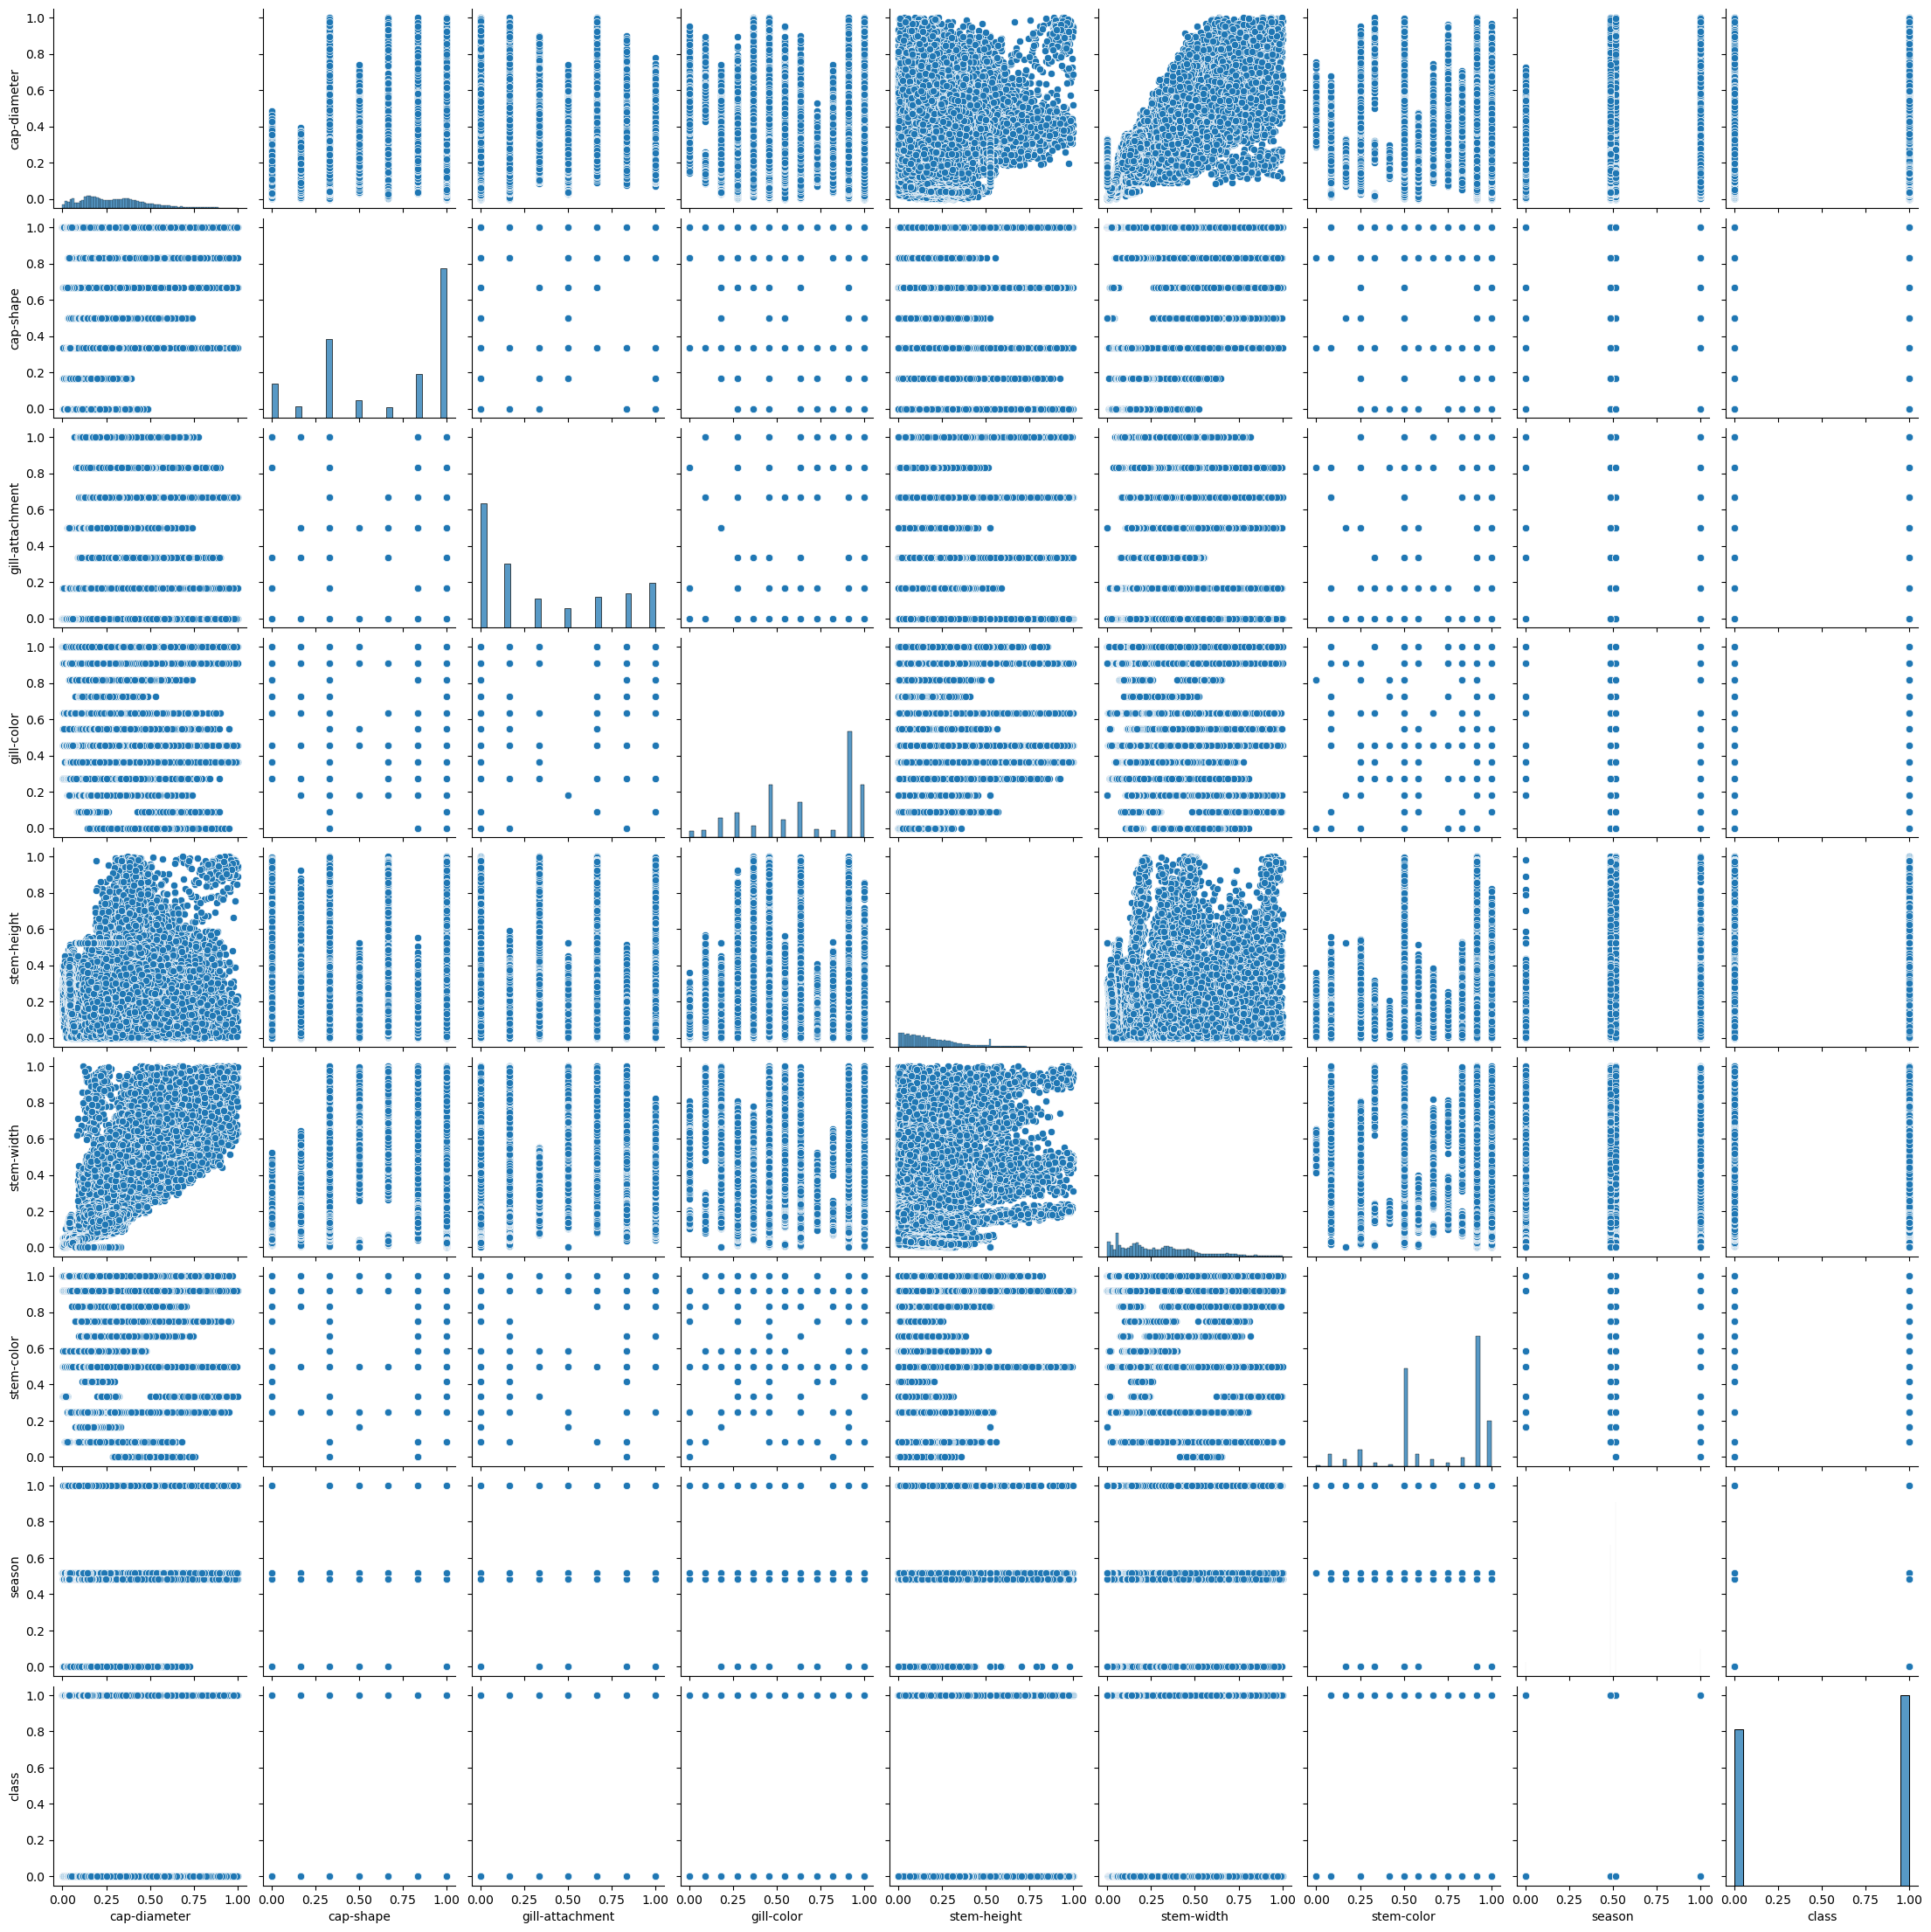

In [91]:
#plot pairplot of the dataset
sns.pairplot(df)
plt.show()

In [4]:
covs = pd.DataFrame()
leng = len(df)

covs.index = [cols for cols in df.columns[:-1]]

for column1 in df.columns[:-1]:
    x     = df[column1]
    count = 0
    appo  = []
    Ex    = np.average(x)
    sx    = np.std(x)



    for column2 in df.columns[:-1]:
        y  = df[column2]
        Ey = np.average(y)
        sy = np.std(y)

        Exy = np.average(x*y)

        appo.append((Exy - Ex * Ey)/(sx * sy))

    
    covs[column1] = appo

covs

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
cap-diameter,1.000000,0.204011,0.200481,0.186377,0.135652,0.828469,0.121856,0.113334
cap-shape,0.204011,1.000000,0.043066,0.131387,-0.010393,0.222494,0.029035,0.055442
gill-attachment,0.200481,0.043066,1.000000,0.100276,-0.075284,0.245300,0.020073,-0.040315
gill-color,0.186377,0.131387,0.100276,1.000000,0.015057,0.110283,0.186090,0.059965
stem-height,0.135652,-0.010393,-0.075284,0.015057,1.000000,0.098095,0.002624,-0.000292
stem-width,0.828469,0.222494,0.245300,0.110283,0.098095,1.000000,0.157394,0.040679
stem-color,0.121856,0.029035,0.020073,0.186090,0.002624,0.157394,1.000000,0.010750
season,0.113334,0.055442,-0.040315,0.059965,-0.000292,0.040679,0.010750,1.000000


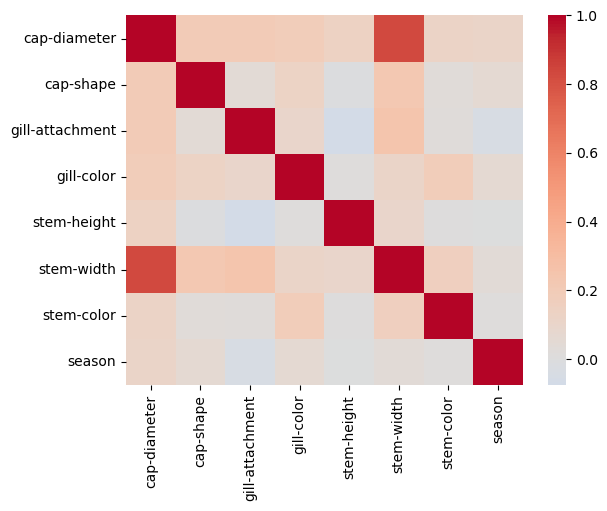

In [43]:
sns.heatmap(covs , cmap = 'coolwarm' , center = 0)
plt.show()

Split the set in test/validation/test datasets.

In [13]:
def divide_set(df , train_ratio , test_ratio , val_ratio = 0):
    print('Ratios:')
    print(f'Train: {train_ratio:.2f} , Vaidation {val_ratio:.2f} , Test: {test_ratio:.2f}')
    assert train_ratio + test_ratio + val_ratio ==1
    appo     = pd.DataFrame(df)
    train_df = appo.sample(frac = train_ratio)
    appo     = appo.drop(train_df.index)
    
    test_ratio /= 1-train_ratio 
    val_ratio  /= 1-train_ratio
    test_df     = appo.sample(frac = test_ratio)
    appo        = appo.drop(test_df.index)
    
    split   = {
        'train' : [train_df.drop(columns = 'class') , train_df['class']] ,
        'val'   : [appo.drop(columns = 'class')    , appo['class']] ,
        'test'  : [test_df.drop(columns = 'class') , test_df['class']]
    }

    return split

df_division = divide_set(df , 0.6 , 0.2  , 0.2)

Ratios:
Train: 0.60 , Vaidation 0.20 , Test: 0.20


## Create the Neural Network 

Create the first model and train to classify the mushrooms.

My model get an __input number__ of neurons of the first layers, then it doubles for the second one and stays the same for the third one.  For the fouth to the sixth layers the number of neurons if the half of the previous one, and the last has to be with two neurons for the binary classification.

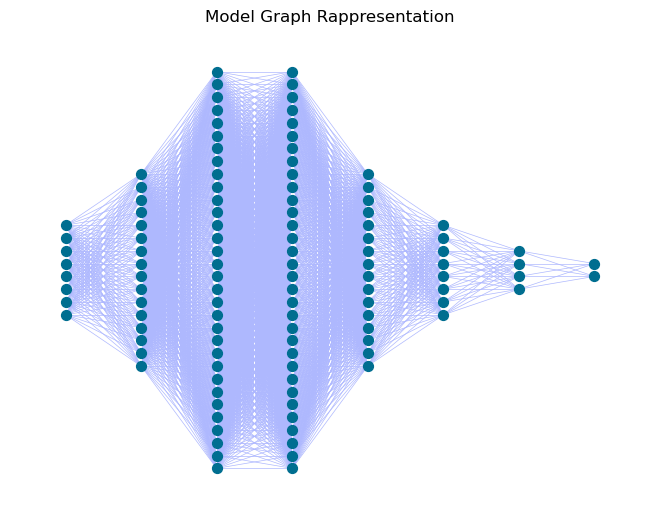

In [3]:
G   = nx.Graph()
pos = []

for i in range(8):
    G.add_node(i)
    pos.append([0,.5*i-2])

for i in range(16):
    G.add_node(8+i)
    pos.append([1,.5*i-4])
    for j in range(8):
        G.add_edge(j,8+i)

for i in range(32):
    G.add_node(24+i)
    pos.append([2,.5*i-8])
    for j in range(16):
        G.add_edge(8+j,24+i)

for i in range(32):
    G.add_node(56+i)
    pos.append([3,.5*i-8])
    for j in range(32):
        G.add_edge(24+j,56+i)

for i in range(16):
    G.add_node(88+i)
    pos.append([4,.5*i-4])
    for j in range(32):
        G.add_edge(56+j,88+i)

for i in range(8):
    G.add_node(104+i)
    pos.append([5,.5*i-2])
    for j in range(16):
        G.add_edge(88+j,104+i)

for i in range(4):
    G.add_node(112+i)
    pos.append([6,.5*i-1])
    for j in range(8):
        G.add_edge(104+j,112+i)

for i in range(2):
    G.add_node(116+i)
    pos.append([7,.5*i-.5])
    for j in range(4):
        G.add_edge(112+j,116+i)

nx.draw(G , pos = pos , node_size = 50 , node_color = '#006E90' , edge_color = '#AEB8FE' , width = .5)
plt.title('Model Graph Rappresentation')
plt.show()

In [7]:
def create_model(init_nodes):
    model = keras.models.Sequential()
    nodes = init_nodes

    model.add(keras.layers.Dense(nodes , activation = 'relu' , input_shape = (8,) ))
    nodes *= 2
    model.add(keras.layers.Dense(nodes , activation = 'relu'))
    model.add(keras.layers.Dense(nodes , activation = 'relu'))
    nodes = int(nodes * .5)
    model.add(keras.layers.Dense(nodes , activation = 'relu'))
    nodes = max(int(nodes / 2) , 1)
    model.add(keras.layers.Dense(nodes , activation = 'relu'))
    nodes = max(int(nodes / 2) , 1)
    model.add(keras.layers.Dense(nodes , activation = 'relu'))
    model.add(keras.layers.Dense(2   , activation = 'softmax'))

    return model

model = create_model(16)
model.compile(optimizer = 'adam' ,
              loss      = keras.losses.SparseCategoricalCrossentropy() ,
              metrics = ['accuracy'])
model.summary()

/home/sergio/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 2)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,454 (9.59 KB)

 Trainable params: 2,454 (9.59 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(df_division['train'][0].to_numpy() , df_division['train'][1].to_numpy() ,
                    validation_data = (df_division['val'][0].to_numpy() , df_division['val'][1].to_numpy()) ,
                    epochs = 100)

Epoch 1/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6122 - loss: 0.6468 - val_accuracy: 0.7463 - val_loss: 0.5257
Epoch 2/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.7586 - loss: 0.4994 - val_accuracy: 0.8292 - val_loss: 0.4021
Epoch 3/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8263 - loss: 0.3906 - val_accuracy: 0.8582 - val_loss: 0.3316
Epoch 4/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8577 - loss: 0.3264 - val_accuracy: 0.8801 - val_loss: 0.2850
Epoch 5/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8718 - loss: 0.2948 - val_accuracy: 0.8797 - val_loss: 0.2949
Epoch 6/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8865 - loss: 0.2717 - val_accuracy: 0.8978 - val_loss: 0.2457
Epoch 7/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8953 - loss: 0.2483 - val_accuracy: 0.9222 - val_loss: 0.1998
Epoch 8/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.

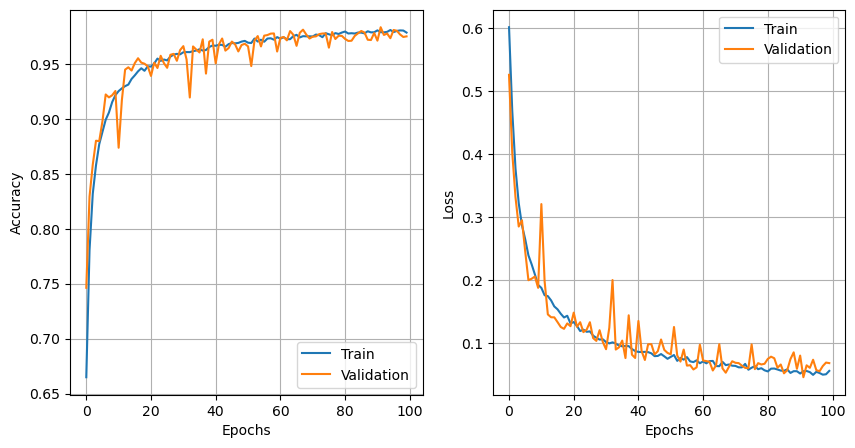

In [8]:
plt.figure(figsize = (10 , 5))

plt.subplot(1 , 2 , 1)

plt.plot(history.history['accuracy']     , label = 'Train')
plt.plot(history.history['val_accuracy'] , label = 'Validation')

plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1 , 2 , 2)

plt.plot(history.history['loss']     , label = 'Train')
plt.plot(history.history['val_loss'] , label = 'Validation')

plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [9]:
vals = model.evaluate(df_division['test'][0].to_numpy() , df_division['test'][1].to_numpy())

print(f"Accuracy {vals[1]*100:.1f} % , Loss {vals[0]:.3f}")

338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9725 - loss: 0.0805
Accuracy 97.2 % , Loss 0.080


The NN converges quikly, I see that the accuracy reach around $90 \%$ in $5$ epochs.

This configuration is prety good, but, I want to study others configurations to find a better one.

## Hyperparamenter Optimization

To optimize the NN I studied the dependencies by:

1. The numbers of nodes in the first layers.
2. The learning rate.

In [10]:
import optuna
from optuna.visualization import plot_contour , plot_rank
from optuna.samplers import TPESampler , RandomSampler
from optuna.importance import get_param_importances

To evaluate the DNN, I used 5 epochs therefor the score is also based on its time of convergency.  That means the fastest DNNs get a better score.

In [11]:
def train(df , trial , ino , lr):
    model = create_model(trial.suggest_int('initial_nodes' , ino[0] , ino[1]))

    optimizer = keras.optimizers.Adam(learning_rate = trial.suggest_float('learning_rate' , lr[0] , lr[1] , log = True))
    model.compile(optimizer = optimizer ,
                  loss      = keras.losses.SparseCategoricalCrossentropy() ,
                  metrics   = ['accuracy'])

    model.fit(df['train'][0].to_numpy() , df['train'][1].to_numpy() ,
              validation_data = (df['val'][0].to_numpy() , df['val'][1].to_numpy()) ,
              epochs = 5)

    return model

In [12]:
def test(model , df):
    evaluation = model.evaluate(df['test'][0].to_numpy() , df['test'][1].to_numpy())

    return evaluation[1]

In [13]:
class Object:
    def __init__(self):
        self.ino = [16    , 128]
        self.lr  = [1e-10 , 1]

    def __call__(self,trial):
        model = train(df_division , trial , self.ino ,self.lr)
        score = test(model , df_division)

        return score
    
    def set_params(self , ino , lr):
        self.ino = ino
        self.lr  = lr

objective = Object()

To get a better study of the _parameter space_ I decide to use a __Random Sampler__, at first.

In [14]:
sampler = RandomSampler(seed = 0)
study   = optuna.create_study(direction = 'maximize' , sampler = sampler)
study.optimize(objective , n_trials = 50)

[I 2024-07-02 20:00:58,543] A new study created in memory with name: no-name-b31130b0-0747-4be2-9b4a-ac8b3c12eb07
/home/sergio/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.6721 - loss: 0.5807 - val_accuracy: 0.8544 - val_loss: 0.3045
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.8748 - loss: 0.2759 - val_accuracy: 0.9277 - val_loss: 0.1732
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9263 - loss: 0.1670 - val_accuracy: 0.9403 - val_loss: 0.1456
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9492 - loss: 0.1232 - val_accuracy: 0.9435 - val_loss: 0.1368
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.9546 - loss: 0.1121 - val_accuracy: 0.9675 - val_loss: 0.0849
338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9637 - loss: 0.0939


[I 2024-07-02 20:02:50,584] Trial 0 finished with value: 0.9651151895523071 and parameters: {'initial_nodes': 78, 'learning_rate': 0.0014187101103672111}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 36s 23ms/step - accuracy: 0.6005 - loss: 0.6747 - val_accuracy: 0.6659 - val_loss: 0.6151
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.6770 - loss: 0.6048 - val_accuracy: 0.6944 - val_loss: 0.5794
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.6982 - loss: 0.5715 - val_accuracy: 0.7147 - val_loss: 0.5435
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 26s 18ms/step - accuracy: 0.7226 - loss: 0.5370 - val_accuracy: 0.7422 - val_loss: 0.5109
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 14ms/step - accuracy: 0.7509 - loss: 0.5050 - val_accuracy: 0.7802 - val_loss: 0.4721
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7757 - loss: 0.4771


[I 2024-07-02 20:04:54,425] Trial 1 finished with value: 0.7785694599151611 and parameters: {'initial_nodes': 84, 'learning_rate': 2.8108122006183503e-05}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 37s 22ms/step - accuracy: 0.6675 - loss: 0.6065 - val_accuracy: 0.8077 - val_loss: 0.4272
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.8255 - loss: 0.3935 - val_accuracy: 0.8901 - val_loss: 0.2685
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8942 - loss: 0.2567 - val_accuracy: 0.9208 - val_loss: 0.1972
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9257 - loss: 0.1910 - val_accuracy: 0.9306 - val_loss: 0.1688
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9421 - loss: 0.1517 - val_accuracy: 0.9594 - val_loss: 0.1180
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9562 - loss: 0.1220


[I 2024-07-02 20:06:48,294] Trial 2 finished with value: 0.9569723606109619 and parameters: {'initial_nodes': 63, 'learning_rate': 0.0002877008405067789}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5279 - loss: 0.7552 - val_accuracy: 0.5507 - val_loss: 0.6881
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5433 - loss: 0.6906 - val_accuracy: 0.5507 - val_loss: 0.6882
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5448 - loss: 0.6907 - val_accuracy: 0.4493 - val_loss: 0.6966
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5397 - loss: 0.6909 - val_accuracy: 0.5507 - val_loss: 0.6958
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5374 - loss: 0.6918 - val_accuracy: 0.5507 - val_loss: 0.6881
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5417 - loss: 0.6902


[I 2024-07-02 20:07:57,444] Trial 3 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 65, 'learning_rate': 0.08274276086161435}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.4565 - loss: 0.6936 - val_accuracy: 0.5121 - val_loss: 0.6921
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.5388 - loss: 0.6915 - val_accuracy: 0.5934 - val_loss: 0.6905
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.5965 - loss: 0.6903 - val_accuracy: 0.6283 - val_loss: 0.6891
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.6310 - loss: 0.6887 - val_accuracy: 0.6408 - val_loss: 0.6877
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.6390 - loss: 0.6875 - val_accuracy: 0.6467 - val_loss: 0.6862
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6357 - loss: 0.6866


[I 2024-07-02 20:09:41,735] Trial 4 finished with value: 0.6402331590652466 and parameters: {'initial_nodes': 124, 'learning_rate': 6.829913261377663e-07}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5718 - loss: 0.6823 - val_accuracy: 0.6651 - val_loss: 0.6272
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6748 - loss: 0.6140 - val_accuracy: 0.6999 - val_loss: 0.5803
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7093 - loss: 0.5720 - val_accuracy: 0.7254 - val_loss: 0.5431
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.7330 - loss: 0.5355 - val_accuracy: 0.7642 - val_loss: 0.5083
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.7700 - loss: 0.4974 - val_accuracy: 0.7924 - val_loss: 0.4676
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7848 - loss: 0.4739


[I 2024-07-02 20:11:16,854] Trial 5 finished with value: 0.7908762693405151 and parameters: {'initial_nodes': 105, 'learning_rate': 1.9451325325217144e-05}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5263 - loss: 3.8203 - val_accuracy: 0.5507 - val_loss: 0.6881
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.5391 - loss: 0.6925 - val_accuracy: 0.5507 - val_loss: 0.6880
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.5333 - loss: 0.6932 - val_accuracy: 0.4493 - val_loss: 0.6971
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5328 - loss: 0.6951 - val_accuracy: 0.4493 - val_loss: 0.7379
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5207 - loss: 0.6985 - val_accuracy: 0.5507 - val_loss: 0.6883
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5417 - loss: 0.6897


[I 2024-07-02 20:12:44,018] Trial 6 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 80, 'learning_rate': 0.1802878181559545}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.4480 - loss: 0.6947 - val_accuracy: 0.4493 - val_loss: 0.6945
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.4560 - loss: 0.6942 - val_accuracy: 0.4493 - val_loss: 0.6945
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.4505 - loss: 0.6945 - val_accuracy: 0.4493 - val_loss: 0.6945
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4527 - loss: 0.6944 - val_accuracy: 0.4493 - val_loss: 0.6945
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.4501 - loss: 0.6946 - val_accuracy: 0.4493 - val_loss: 0.6945
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4583 - loss: 0.6942


[I 2024-07-02 20:13:54,866] Trial 7 finished with value: 0.4529471695423126 and parameters: {'initial_nodes': 24, 'learning_rate': 7.435205853060182e-10}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6236 - loss: 0.6419 - val_accuracy: 0.6750 - val_loss: 0.5822
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.6741 - loss: 0.5914 - val_accuracy: 0.6935 - val_loss: 0.5722
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.6629 - loss: 0.5966 - val_accuracy: 0.5507 - val_loss: 0.6340
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 11ms/step - accuracy: 0.5768 - loss: 0.6445 - val_accuracy: 0.6908 - val_loss: 0.6119
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5699 - loss: 0.6764 - val_accuracy: 0.5507 - val_loss: 0.6881
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5417 - loss: 0.6897


[I 2024-07-02 20:14:57,558] Trial 8 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 18, 'learning_rate': 0.021193293640885156}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5396 - loss: 0.7471 - val_accuracy: 0.5507 - val_loss: 0.6889
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.5439 - loss: 0.6904 - val_accuracy: 0.5507 - val_loss: 0.6880
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.5488 - loss: 0.6903 - val_accuracy: 0.5507 - val_loss: 0.6887
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5444 - loss: 0.6900 - val_accuracy: 0.4493 - val_loss: 0.6940
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5455 - loss: 0.6897 - val_accuracy: 0.5507 - val_loss: 0.6880
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5417 - loss: 0.6898


[I 2024-07-02 20:16:28,794] Trial 9 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 103, 'learning_rate': 0.05013274471944537}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.6467 - loss: 0.6219 - val_accuracy: 0.7428 - val_loss: 0.5169
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.7458 - loss: 0.4953 - val_accuracy: 0.7761 - val_loss: 0.4593
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8107 - loss: 0.4091 - val_accuracy: 0.8453 - val_loss: 0.3347
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.8559 - loss: 0.3183 - val_accuracy: 0.8750 - val_loss: 0.3320
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8868 - loss: 0.2591 - val_accuracy: 0.8857 - val_loss: 0.4359
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8799 - loss: 0.4190


[I 2024-07-02 20:18:07,675] Trial 10 finished with value: 0.8839641213417053 and parameters: {'initial_nodes': 126, 'learning_rate': 0.009808117097306142}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6403 - loss: 0.6068 - val_accuracy: 0.7586 - val_loss: 0.4609
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7924 - loss: 0.4118 - val_accuracy: 0.8659 - val_loss: 0.2838
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8777 - loss: 0.2664 - val_accuracy: 0.9075 - val_loss: 0.2100
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9142 - loss: 0.1954 - val_accuracy: 0.8916 - val_loss: 0.2418
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9310 - loss: 0.1691 - val_accuracy: 0.9479 - val_loss: 0.1335
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9487 - loss: 0.1390


[I 2024-07-02 20:19:14,979] Trial 11 finished with value: 0.9491996169090271 and parameters: {'initial_nodes': 68, 'learning_rate': 0.006386924212967849}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6022 - loss: 0.6563 - val_accuracy: 0.6875 - val_loss: 0.5769
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7100 - loss: 0.5591 - val_accuracy: 0.7324 - val_loss: 0.5199
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.7595 - loss: 0.5007 - val_accuracy: 0.7986 - val_loss: 0.4508
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.7965 - loss: 0.4435 - val_accuracy: 0.8290 - val_loss: 0.3897
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8316 - loss: 0.3817 - val_accuracy: 0.8648 - val_loss: 0.3257
338/338 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8614 - loss: 0.3350


[I 2024-07-02 20:20:16,980] Trial 12 finished with value: 0.8672156929969788 and parameters: {'initial_nodes': 29, 'learning_rate': 0.00025073225886269217}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.5150 - loss: 1.5428 - val_accuracy: 0.5507 - val_loss: 0.6881
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.5263 - loss: 0.6989 - val_accuracy: 0.4493 - val_loss: 0.7094
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.5220 - loss: 0.6976 - val_accuracy: 0.5507 - val_loss: 0.6912
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5302 - loss: 0.6975 - val_accuracy: 0.5507 - val_loss: 0.6956
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.5260 - loss: 0.6981 - val_accuracy: 0.5507 - val_loss: 0.6887
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5417 - loss: 0.6899


[I 2024-07-02 20:21:26,658] Trial 13 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 32, 'learning_rate': 0.2796978773551811}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.5419 - loss: 0.6923 - val_accuracy: 0.5513 - val_loss: 0.6903
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.5544 - loss: 0.6897 - val_accuracy: 0.5508 - val_loss: 0.6881
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5520 - loss: 0.6873 - val_accuracy: 0.5508 - val_loss: 0.6859
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5519 - loss: 0.6853 - val_accuracy: 0.5552 - val_loss: 0.6838
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5548 - loss: 0.6833 - val_accuracy: 0.5620 - val_loss: 0.6817
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5531 - loss: 0.6831


[I 2024-07-02 20:22:45,089] Trial 14 finished with value: 0.5593596696853638 and parameters: {'initial_nodes': 74, 'learning_rate': 1.4015848675188285e-06}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6558 - loss: 0.6015 - val_accuracy: 0.8370 - val_loss: 0.3566
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.8415 - loss: 0.3511 - val_accuracy: 0.9046 - val_loss: 0.2328
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 38s 18ms/step - accuracy: 0.8985 - loss: 0.2371 - val_accuracy: 0.9193 - val_loss: 0.1882
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 19ms/step - accuracy: 0.9258 - loss: 0.1787 - val_accuracy: 0.9281 - val_loss: 0.1606
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9346 - loss: 0.1579 - val_accuracy: 0.9511 - val_loss: 0.1206
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9524 - loss: 0.1159


[I 2024-07-02 20:24:50,265] Trial 15 finished with value: 0.9522531628608704 and parameters: {'initial_nodes': 45, 'learning_rate': 0.005525058672982481}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.5615 - loss: 0.6710 - val_accuracy: 0.6867 - val_loss: 0.6021
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.7056 - loss: 0.5901 - val_accuracy: 0.7471 - val_loss: 0.5347
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.7539 - loss: 0.5218 - val_accuracy: 0.7788 - val_loss: 0.4759
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.7919 - loss: 0.4624 - val_accuracy: 0.8046 - val_loss: 0.4318
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.8189 - loss: 0.4134 - val_accuracy: 0.8395 - val_loss: 0.3754
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8324 - loss: 0.3820


[I 2024-07-02 20:26:41,779] Trial 16 finished with value: 0.838715672492981 and parameters: {'initial_nodes': 67, 'learning_rate': 4.834365574995679e-05}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.5793 - loss: 0.6720 - val_accuracy: 0.6710 - val_loss: 0.6100
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.6845 - loss: 0.5996 - val_accuracy: 0.7148 - val_loss: 0.5633
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.7233 - loss: 0.5531 - val_accuracy: 0.7411 - val_loss: 0.5183
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.7544 - loss: 0.5096 - val_accuracy: 0.7752 - val_loss: 0.4750
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.7771 - loss: 0.4692 - val_accuracy: 0.7904 - val_loss: 0.4389
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7919 - loss: 0.4460


[I 2024-07-02 20:28:29,963] Trial 17 finished with value: 0.7956879734992981 and parameters: {'initial_nodes': 18, 'learning_rate': 0.00015009111045464067}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.6319 - loss: 0.6349 - val_accuracy: 0.7701 - val_loss: 0.4848
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.7893 - loss: 0.4519 - val_accuracy: 0.8470 - val_loss: 0.3399
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.8590 - loss: 0.3190 - val_accuracy: 0.8667 - val_loss: 0.3083
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9006 - loss: 0.2391 - val_accuracy: 0.9228 - val_loss: 0.1946
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9227 - loss: 0.1935 - val_accuracy: 0.9447 - val_loss: 0.1535
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9463 - loss: 0.1573


[I 2024-07-02 20:30:22,663] Trial 18 finished with value: 0.9434625506401062 and parameters: {'initial_nodes': 85, 'learning_rate': 0.0001476862178900877}. Best is trial 0 with value: 0.9651151895523071.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 32s 23ms/step - accuracy: 0.7038 - loss: 0.5485 - val_accuracy: 0.8931 - val_loss: 0.2490
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.9049 - loss: 0.2286 - val_accuracy: 0.9455 - val_loss: 0.1405
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 40s 22ms/step - accuracy: 0.9438 - loss: 0.1425 - val_accuracy: 0.9598 - val_loss: 0.1089
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9575 - loss: 0.1049 - val_accuracy: 0.9684 - val_loss: 0.0871
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9630 - loss: 0.0960 - val_accuracy: 0.9723 - val_loss: 0.0697
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9701 - loss: 0.0710


[I 2024-07-02 20:33:07,507] Trial 19 finished with value: 0.971129834651947 and parameters: {'initial_nodes': 122, 'learning_rate': 0.0006579653011946036}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4405 - loss: 0.6950 - val_accuracy: 0.5430 - val_loss: 0.6924
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5439 - loss: 0.6920 - val_accuracy: 0.5520 - val_loss: 0.6908
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5484 - loss: 0.6905 - val_accuracy: 0.5507 - val_loss: 0.6886
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5516 - loss: 0.6880 - val_accuracy: 0.5507 - val_loss: 0.6868
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5493 - loss: 0.6863 - val_accuracy: 0.5507 - val_loss: 0.6848
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5417 - loss: 0.6855


[I 2024-07-02 20:34:46,950] Trial 20 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 56, 'learning_rate': 2.3459542478082196e-06}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 27s 18ms/step - accuracy: 0.5457 - loss: 0.6924 - val_accuracy: 0.5467 - val_loss: 0.6926
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.5519 - loss: 0.6924 - val_accuracy: 0.5467 - val_loss: 0.6926
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.5417 - loss: 0.6926 - val_accuracy: 0.5467 - val_loss: 0.6926
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5488 - loss: 0.6924 - val_accuracy: 0.5467 - val_loss: 0.6926
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.5432 - loss: 0.6926 - val_accuracy: 0.5467 - val_loss: 0.6926
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5389 - loss: 0.6928


[I 2024-07-02 20:36:35,696] Trial 21 finished with value: 0.5440918207168579 and parameters: {'initial_nodes': 94, 'learning_rate': 4.001793885336988e-10}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.6991 - loss: 0.5560 - val_accuracy: 0.8832 - val_loss: 0.2734
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8847 - loss: 0.2709 - val_accuracy: 0.9189 - val_loss: 0.2051
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.9347 - loss: 0.1678 - val_accuracy: 0.9535 - val_loss: 0.1348
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9509 - loss: 0.1271 - val_accuracy: 0.9677 - val_loss: 0.0890
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9619 - loss: 0.0990 - val_accuracy: 0.9584 - val_loss: 0.1087
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9599 - loss: 0.1172


[I 2024-07-02 20:38:27,306] Trial 22 finished with value: 0.9605811238288879 and parameters: {'initial_nodes': 91, 'learning_rate': 0.0005086027407695676}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5470 - loss: 0.6904 - val_accuracy: 0.5507 - val_loss: 0.6904
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.5482 - loss: 0.6905 - val_accuracy: 0.5507 - val_loss: 0.6904
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.5521 - loss: 0.6902 - val_accuracy: 0.5507 - val_loss: 0.6904
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.5502 - loss: 0.6902 - val_accuracy: 0.5507 - val_loss: 0.6904
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5502 - loss: 0.6900 - val_accuracy: 0.5507 - val_loss: 0.6904
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5417 - loss: 0.6912


[I 2024-07-02 20:40:12,920] Trial 23 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 39, 'learning_rate': 1.9465384042153084e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.4700 - loss: 0.6934 - val_accuracy: 0.4850 - val_loss: 0.6932
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.4887 - loss: 0.6932 - val_accuracy: 0.5014 - val_loss: 0.6929
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5056 - loss: 0.6926 - val_accuracy: 0.5187 - val_loss: 0.6925
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5194 - loss: 0.6923 - val_accuracy: 0.5320 - val_loss: 0.6921
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5340 - loss: 0.6919 - val_accuracy: 0.5419 - val_loss: 0.6918
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5366 - loss: 0.6919


[I 2024-07-02 20:41:56,965] Trial 24 finished with value: 0.5400203466415405 and parameters: {'initial_nodes': 51, 'learning_rate': 4.3361840680567003e-07}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5498 - loss: 0.6919 - val_accuracy: 0.5507 - val_loss: 0.6892
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.5495 - loss: 0.6884 - val_accuracy: 0.5507 - val_loss: 0.6856
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.5559 - loss: 0.6842 - val_accuracy: 0.5531 - val_loss: 0.6816
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.5538 - loss: 0.6805 - val_accuracy: 0.5774 - val_loss: 0.6768
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.5789 - loss: 0.6758 - val_accuracy: 0.5970 - val_loss: 0.6723
338/338 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5898 - loss: 0.6734


[I 2024-07-02 20:43:53,583] Trial 25 finished with value: 0.5971129536628723 and parameters: {'initial_nodes': 80, 'learning_rate': 2.4322887698390833e-06}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 32s 22ms/step - accuracy: 0.4788 - loss: 0.6936 - val_accuracy: 0.4756 - val_loss: 0.6935
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.4764 - loss: 0.6936 - val_accuracy: 0.4758 - val_loss: 0.6935
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.4767 - loss: 0.6936 - val_accuracy: 0.4759 - val_loss: 0.6935
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.4758 - loss: 0.6936 - val_accuracy: 0.4758 - val_loss: 0.6935
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.4789 - loss: 0.6935 - val_accuracy: 0.4759 - val_loss: 0.6935
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4843 - loss: 0.6935


[I 2024-07-02 20:47:13,966] Trial 26 finished with value: 0.47885629534721375 and parameters: {'initial_nodes': 127, 'learning_rate': 1.0482095387452723e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.4476 - loss: 0.7003 - val_accuracy: 0.4495 - val_loss: 0.7002
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.4536 - loss: 0.6993 - val_accuracy: 0.4495 - val_loss: 0.7002
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.4465 - loss: 0.7005 - val_accuracy: 0.4495 - val_loss: 0.7001
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.4510 - loss: 0.6996 - val_accuracy: 0.4495 - val_loss: 0.7001
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4513 - loss: 0.6998 - val_accuracy: 0.4495 - val_loss: 0.7001
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4576 - loss: 0.6991


[I 2024-07-02 20:48:39,354] Trial 27 finished with value: 0.4533172845840454 and parameters: {'initial_nodes': 39, 'learning_rate': 4.1029401210349874e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.4688 - loss: 0.6946 - val_accuracy: 0.4622 - val_loss: 0.6949
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.4742 - loss: 0.6946 - val_accuracy: 0.4690 - val_loss: 0.6947
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4824 - loss: 0.6944 - val_accuracy: 0.4820 - val_loss: 0.6945
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.4940 - loss: 0.6942 - val_accuracy: 0.4909 - val_loss: 0.6943
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - accuracy: 0.5026 - loss: 0.6940 - val_accuracy: 0.4977 - val_loss: 0.6941
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5122 - loss: 0.6937


[I 2024-07-02 20:50:27,538] Trial 28 finished with value: 0.5054131746292114 and parameters: {'initial_nodes': 89, 'learning_rate': 3.411269453930662e-08}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.5662 - loss: 0.6924 - val_accuracy: 0.5735 - val_loss: 0.6922
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5686 - loss: 0.6922 - val_accuracy: 0.5750 - val_loss: 0.6921
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.5580 - loss: 0.6925 - val_accuracy: 0.5756 - val_loss: 0.6921
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5706 - loss: 0.6922 - val_accuracy: 0.5742 - val_loss: 0.6920
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5714 - loss: 0.6920 - val_accuracy: 0.5729 - val_loss: 0.6920
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5652 - loss: 0.6922


[I 2024-07-02 20:52:06,337] Trial 29 finished with value: 0.5694457292556763 and parameters: {'initial_nodes': 68, 'learning_rate': 2.781351773280943e-08}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.5488 - loss: 0.6913 - val_accuracy: 0.5500 - val_loss: 0.6914
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.5458 - loss: 0.6918 - val_accuracy: 0.5500 - val_loss: 0.6914
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 15ms/step - accuracy: 0.5483 - loss: 0.6915 - val_accuracy: 0.5500 - val_loss: 0.6914
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5460 - loss: 0.6916 - val_accuracy: 0.5500 - val_loss: 0.6914
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.5486 - loss: 0.6914 - val_accuracy: 0.5499 - val_loss: 0.6914
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5421 - loss: 0.6923


[I 2024-07-02 20:53:47,867] Trial 30 finished with value: 0.5458499193191528 and parameters: {'initial_nodes': 33, 'learning_rate': 1.2698470419737912e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.4671 - loss: 0.6936 - val_accuracy: 0.4744 - val_loss: 0.6935
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.4686 - loss: 0.6936 - val_accuracy: 0.4745 - val_loss: 0.6935
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.4740 - loss: 0.6935 - val_accuracy: 0.4746 - val_loss: 0.6935
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.4682 - loss: 0.6937 - val_accuracy: 0.4747 - val_loss: 0.6935
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.4757 - loss: 0.6936 - val_accuracy: 0.4747 - val_loss: 0.6935
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4697 - loss: 0.6936


[I 2024-07-02 20:55:35,667] Trial 31 finished with value: 0.4690478444099426 and parameters: {'initial_nodes': 90, 'learning_rate': 2.408959582584204e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.5466 - loss: 0.6919 - val_accuracy: 0.5528 - val_loss: 0.6913
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5555 - loss: 0.6909 - val_accuracy: 0.5524 - val_loss: 0.6909
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.5450 - loss: 0.6911 - val_accuracy: 0.5510 - val_loss: 0.6905
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5495 - loss: 0.6905 - val_accuracy: 0.5510 - val_loss: 0.6902
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.5518 - loss: 0.6899 - val_accuracy: 0.5507 - val_loss: 0.6899
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5419 - loss: 0.6902


[I 2024-07-02 20:57:10,089] Trial 32 finished with value: 0.5471453666687012 and parameters: {'initial_nodes': 38, 'learning_rate': 4.866891972890962e-07}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.4492 - loss: 0.6962 - val_accuracy: 0.4493 - val_loss: 0.6960
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.4508 - loss: 0.6959 - val_accuracy: 0.4493 - val_loss: 0.6960
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.4500 - loss: 0.6960 - val_accuracy: 0.4493 - val_loss: 0.6960
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.4531 - loss: 0.6959 - val_accuracy: 0.4493 - val_loss: 0.6960
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.4533 - loss: 0.6958 - val_accuracy: 0.4493 - val_loss: 0.6960
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4583 - loss: 0.6957


[I 2024-07-02 20:58:58,979] Trial 33 finished with value: 0.4529471695423126 and parameters: {'initial_nodes': 108, 'learning_rate': 9.354331532348301e-10}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.5442 - loss: 0.6926 - val_accuracy: 0.5507 - val_loss: 0.6923
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.5495 - loss: 0.6924 - val_accuracy: 0.5507 - val_loss: 0.6923
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 39s 19ms/step - accuracy: 0.5462 - loss: 0.6925 - val_accuracy: 0.5507 - val_loss: 0.6923
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.5502 - loss: 0.6923 - val_accuracy: 0.5507 - val_loss: 0.6923
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.5514 - loss: 0.6923 - val_accuracy: 0.5507 - val_loss: 0.6923
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5417 - loss: 0.6928


[I 2024-07-02 21:01:36,557] Trial 34 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 110, 'learning_rate': 9.140797310621151e-10}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 34s 23ms/step - accuracy: 0.5562 - loss: 0.6893 - val_accuracy: 0.5993 - val_loss: 0.6763
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.6158 - loss: 0.6720 - val_accuracy: 0.6409 - val_loss: 0.6578
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.6513 - loss: 0.6539 - val_accuracy: 0.6600 - val_loss: 0.6395
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.6716 - loss: 0.6342 - val_accuracy: 0.6732 - val_loss: 0.6212
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 20ms/step - accuracy: 0.6781 - loss: 0.6167 - val_accuracy: 0.6881 - val_loss: 0.6051
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6800 - loss: 0.6084


[I 2024-07-02 21:04:41,879] Trial 35 finished with value: 0.6856666803359985 and parameters: {'initial_nodes': 126, 'learning_rate': 4.858609740197809e-06}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.6476 - loss: 0.6327 - val_accuracy: 0.7621 - val_loss: 0.4938
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 42s 22ms/step - accuracy: 0.8107 - loss: 0.4278 - val_accuracy: 0.8438 - val_loss: 0.3387
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.8655 - loss: 0.3052 - val_accuracy: 0.9009 - val_loss: 0.2417
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9017 - loss: 0.2274 - val_accuracy: 0.9040 - val_loss: 0.2245
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 40s 21ms/step - accuracy: 0.9273 - loss: 0.1847 - val_accuracy: 0.9089 - val_loss: 0.2093
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9094 - loss: 0.2130


[I 2024-07-02 21:08:03,821] Trial 36 finished with value: 0.9113537669181824 and parameters: {'initial_nodes': 126, 'learning_rate': 0.0001118034480316462}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5302 - loss: 0.6932 - val_accuracy: 0.5329 - val_loss: 0.6932
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 15ms/step - accuracy: 0.5369 - loss: 0.6931 - val_accuracy: 0.5329 - val_loss: 0.6932
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5308 - loss: 0.6932 - val_accuracy: 0.5329 - val_loss: 0.6932
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.5357 - loss: 0.6932 - val_accuracy: 0.5329 - val_loss: 0.6932
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.5357 - loss: 0.6931 - val_accuracy: 0.5329 - val_loss: 0.6932
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5245 - loss: 0.6932


[I 2024-07-02 21:09:57,209] Trial 37 finished with value: 0.529934287071228 and parameters: {'initial_nodes': 99, 'learning_rate': 2.4653462464495744e-10}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.4949 - loss: 0.6939 - val_accuracy: 0.4929 - val_loss: 0.6939
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4894 - loss: 0.6939 - val_accuracy: 0.4929 - val_loss: 0.6939
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4926 - loss: 0.6938 - val_accuracy: 0.4929 - val_loss: 0.6939
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4984 - loss: 0.6938 - val_accuracy: 0.4929 - val_loss: 0.6939
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4935 - loss: 0.6939 - val_accuracy: 0.4929 - val_loss: 0.6939
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4896 - loss: 0.6938


[I 2024-07-02 21:11:32,253] Trial 38 finished with value: 0.48662903904914856 and parameters: {'initial_nodes': 47, 'learning_rate': 1.592082659374324e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.4295 - loss: 0.6965 - val_accuracy: 0.4365 - val_loss: 0.6962
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.4370 - loss: 0.6962 - val_accuracy: 0.4365 - val_loss: 0.6962
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.4374 - loss: 0.6962 - val_accuracy: 0.4364 - val_loss: 0.6962
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.4350 - loss: 0.6963 - val_accuracy: 0.4363 - val_loss: 0.6962
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.4327 - loss: 0.6964 - val_accuracy: 0.4363 - val_loss: 0.6962
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4444 - loss: 0.6958


[I 2024-07-02 21:13:14,424] Trial 39 finished with value: 0.43666142225265503 and parameters: {'initial_nodes': 49, 'learning_rate': 1.5391366847232677e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.5150 - loss: 0.6930 - val_accuracy: 0.5170 - val_loss: 0.6921
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.5282 - loss: 0.6916 - val_accuracy: 0.5697 - val_loss: 0.6892
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.5650 - loss: 0.6892 - val_accuracy: 0.5568 - val_loss: 0.6879
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5516 - loss: 0.6878 - val_accuracy: 0.5546 - val_loss: 0.6869
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5521 - loss: 0.6866 - val_accuracy: 0.5564 - val_loss: 0.6859
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5450 - loss: 0.6866


[I 2024-07-02 21:15:05,602] Trial 40 finished with value: 0.5505690574645996 and parameters: {'initial_nodes': 51, 'learning_rate': 1.3887687809398972e-06}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6309 - loss: 0.6465 - val_accuracy: 0.7206 - val_loss: 0.5438
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.7455 - loss: 0.5072 - val_accuracy: 0.8206 - val_loss: 0.4000
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8179 - loss: 0.3874 - val_accuracy: 0.8540 - val_loss: 0.3343
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.8665 - loss: 0.3071 - val_accuracy: 0.8938 - val_loss: 0.2587
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8919 - loss: 0.2530 - val_accuracy: 0.9157 - val_loss: 0.2261
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9147 - loss: 0.2218


[I 2024-07-02 21:16:29,211] Trial 41 finished with value: 0.9150550365447998 and parameters: {'initial_nodes': 23, 'learning_rate': 0.0008408551601517393}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.5502 - loss: 0.6911 - val_accuracy: 0.5507 - val_loss: 0.6911
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5483 - loss: 0.6912 - val_accuracy: 0.5507 - val_loss: 0.6911
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5489 - loss: 0.6912 - val_accuracy: 0.5507 - val_loss: 0.6910
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5502 - loss: 0.6910 - val_accuracy: 0.5507 - val_loss: 0.6910
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.5493 - loss: 0.6911 - val_accuracy: 0.5507 - val_loss: 0.6909
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5417 - loss: 0.6915


[I 2024-07-02 21:18:06,540] Trial 42 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 80, 'learning_rate': 4.507076290850357e-08}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.5500 - loss: 0.6918 - val_accuracy: 0.5507 - val_loss: 0.6918
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.5502 - loss: 0.6918 - val_accuracy: 0.5507 - val_loss: 0.6918
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5516 - loss: 0.6917 - val_accuracy: 0.5507 - val_loss: 0.6918
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.5456 - loss: 0.6920 - val_accuracy: 0.5507 - val_loss: 0.6918
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.5433 - loss: 0.6921 - val_accuracy: 0.5507 - val_loss: 0.6918
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5417 - loss: 0.6921


[I 2024-07-02 21:19:50,041] Trial 43 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 75, 'learning_rate': 8.697713691175416e-10}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.5345 - loss: 36.5627 - val_accuracy: 0.4493 - val_loss: 0.6993
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.5255 - loss: 0.6975 - val_accuracy: 0.5507 - val_loss: 0.6891
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5338 - loss: 0.6960 - val_accuracy: 0.5507 - val_loss: 0.7017
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5247 - loss: 0.6976 - val_accuracy: 0.4493 - val_loss: 0.6937
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.5301 - loss: 0.6968 - val_accuracy: 0.5507 - val_loss: 0.6902
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5417 - loss: 0.6909


[I 2024-07-02 21:21:29,149] Trial 44 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 81, 'learning_rate': 0.19631883842304762}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.6697 - loss: 0.5992 - val_accuracy: 0.7931 - val_loss: 0.4459
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.8418 - loss: 0.3536 - val_accuracy: 0.8884 - val_loss: 0.2542
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9013 - loss: 0.2356 - val_accuracy: 0.9303 - val_loss: 0.1813
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9324 - loss: 0.1716 - val_accuracy: 0.9459 - val_loss: 0.1388
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9414 - loss: 0.1469 - val_accuracy: 0.9286 - val_loss: 0.1681
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9307 - loss: 0.1682


[I 2024-07-02 21:23:09,390] Trial 45 finished with value: 0.9304154515266418 and parameters: {'initial_nodes': 51, 'learning_rate': 0.0004721758813534989}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6512 - loss: 0.6092 - val_accuracy: 0.8104 - val_loss: 0.4080
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8313 - loss: 0.3663 - val_accuracy: 0.8839 - val_loss: 0.2653
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8939 - loss: 0.2512 - val_accuracy: 0.9212 - val_loss: 0.1927
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9162 - loss: 0.1980 - val_accuracy: 0.9315 - val_loss: 0.1629
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9340 - loss: 0.1663 - val_accuracy: 0.9294 - val_loss: 0.1679
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9302 - loss: 0.1730


[I 2024-07-02 21:24:57,293] Trial 46 finished with value: 0.9286573529243469 and parameters: {'initial_nodes': 30, 'learning_rate': 0.0014563710628103192}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.5539 - loss: 0.6915 - val_accuracy: 0.5507 - val_loss: 0.6917
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5457 - loss: 0.6920 - val_accuracy: 0.5507 - val_loss: 0.6917
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5504 - loss: 0.6916 - val_accuracy: 0.5507 - val_loss: 0.6917
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.5484 - loss: 0.6919 - val_accuracy: 0.5507 - val_loss: 0.6917
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5538 - loss: 0.6915 - val_accuracy: 0.5507 - val_loss: 0.6917
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5417 - loss: 0.6923


[I 2024-07-02 21:26:31,110] Trial 47 finished with value: 0.5470528602600098 and parameters: {'initial_nodes': 48, 'learning_rate': 6.790685543933632e-09}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.4648 - loss: 0.6932 - val_accuracy: 0.4635 - val_loss: 0.6932
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.4622 - loss: 0.6933 - val_accuracy: 0.4635 - val_loss: 0.6932
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4611 - loss: 0.6933 - val_accuracy: 0.4635 - val_loss: 0.6932
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.4641 - loss: 0.6932 - val_accuracy: 0.4635 - val_loss: 0.6932
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4661 - loss: 0.6932 - val_accuracy: 0.4635 - val_loss: 0.6932
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4683 - loss: 0.6932


[I 2024-07-02 21:28:07,299] Trial 48 finished with value: 0.46488386392593384 and parameters: {'initial_nodes': 82, 'learning_rate': 1.58882279431383e-10}. Best is trial 19 with value: 0.971129834651947.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.4527 - loss: 0.6947 - val_accuracy: 0.4493 - val_loss: 0.6948
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.4507 - loss: 0.6948 - val_accuracy: 0.4493 - val_loss: 0.6948
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.4474 - loss: 0.6949 - val_accuracy: 0.4493 - val_loss: 0.6948
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.4521 - loss: 0.6948 - val_accuracy: 0.4493 - val_loss: 0.6948
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.4551 - loss: 0.6947 - val_accuracy: 0.4493 - val_loss: 0.6948
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4583 - loss: 0.6944


[I 2024-07-02 21:29:53,013] Trial 49 finished with value: 0.4529471695423126 and parameters: {'initial_nodes': 109, 'learning_rate': 1.1141784696858781e-10}. Best is trial 19 with value: 0.971129834651947.


In [15]:
fig = plot_contour(study)
fig.show()
fig = plot_rank(study)
fig.show()

/tmp/ipykernel_2206/3727773372.py:3: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



The graphs show that the most important feature between learning rate and neurons in the first layer is the first one.  It's shown by the pattern in the conour plot, that divides the saerch space alomost in horizontal lines.

In [27]:
importance = get_param_importances(study)
print(f"Learning rate : {importance['learning_rate']*100:5.2f}%")
print(f"Initial nodes : {importance['initial_nodes']*100:5.2f}%")

Learning rate : 98.48%
Initial nodes :  1.52%


Indeed, form the impotrtance it's shown that my guess is consistent with the value computed by optuna, where the importance are:

- Learning Rate $\sim 98\%$
- \# nodes in first layer $\sim 2\%$

To investigate a better search spaece I changed some boundaries.  For the __learning rate__, there is a region (between $10^{-2}$ and $10^{-5}$) where the model evaluation seems to get better socores, for this reason it would be a good idea to investigate it more.

It'shown that the __nodes #__ give a better evaluation with higher numbers, it might be by the better capacity to learn from the data.  This behavoir decrease the computational performance and gave an irrilevant improvement in the model's one, for these reasons I decide to not change the bounderies of this parameter.

In [29]:
objective.set_params(ino = [16 , 128] ,
                     lr  = [0.00001 , 0.01])

With a better konwledge of the parameter space, let saple with a __TPE__ algorithm.

In [30]:
sampler = TPESampler(seed = 1)
study_opt = optuna.create_study(direction = 'maximize' , sampler = sampler)
study_opt.optimize(objective , n_trials = 50)

[I 2024-07-02 21:53:04,946] A new study created in memory with name: no-name-e793be2b-757f-4a63-ae34-cfac2bfa4580
/home/sergio/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.6620 - loss: 0.5827 - val_accuracy: 0.8420 - val_loss: 0.3491
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8811 - loss: 0.2725 - val_accuracy: 0.9096 - val_loss: 0.2171
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9269 - loss: 0.1751 - val_accuracy: 0.9485 - val_loss: 0.1337
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9455 - loss: 0.1314 - val_accuracy: 0.9561 - val_loss: 0.1124
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9548 - loss: 0.1129 - val_accuracy: 0.9548 - val_loss: 0.1017
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9557 - loss: 0.1070


[I 2024-07-02 21:54:35,540] Trial 0 finished with value: 0.9573424458503723 and parameters: {'initial_nodes': 63, 'learning_rate': 0.0014486833887239336}. Best is trial 0 with value: 0.9573424458503723.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.5418 - loss: 0.6893 - val_accuracy: 0.5507 - val_loss: 0.6723
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.5618 - loss: 0.6627 - val_accuracy: 0.6481 - val_loss: 0.6245
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6578 - loss: 0.6211 - val_accuracy: 0.6691 - val_loss: 0.6048
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6646 - loss: 0.6077 - val_accuracy: 0.6799 - val_loss: 0.5955
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.6786 - loss: 0.5940 - val_accuracy: 0.6870 - val_loss: 0.5859
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6810 - loss: 0.5888


[I 2024-07-02 21:55:51,484] Trial 1 finished with value: 0.6864994764328003 and parameters: {'initial_nodes': 16, 'learning_rate': 8.072307884499753e-05}. Best is trial 0 with value: 0.9573424458503723.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.5492 - loss: 0.6911 - val_accuracy: 0.5517 - val_loss: 0.6862
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.5642 - loss: 0.6830 - val_accuracy: 0.6028 - val_loss: 0.6724
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.6163 - loss: 0.6677 - val_accuracy: 0.6304 - val_loss: 0.6512
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.6454 - loss: 0.6478 - val_accuracy: 0.6591 - val_loss: 0.6313
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6618 - loss: 0.6286 - val_accuracy: 0.6661 - val_loss: 0.6188
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6563 - loss: 0.6209


[I 2024-07-02 21:57:39,263] Trial 2 finished with value: 0.6622559428215027 and parameters: {'initial_nodes': 32, 'learning_rate': 1.8924123965722247e-05}. Best is trial 0 with value: 0.9573424458503723.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.5581 - loss: 0.6859 - val_accuracy: 0.6673 - val_loss: 0.6462
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.6882 - loss: 0.6224 - val_accuracy: 0.7404 - val_loss: 0.5391
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7466 - loss: 0.5247 - val_accuracy: 0.7807 - val_loss: 0.4737
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.7846 - loss: 0.4626 - val_accuracy: 0.8061 - val_loss: 0.4305
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8097 - loss: 0.4212 - val_accuracy: 0.8251 - val_loss: 0.3879
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8205 - loss: 0.3978


[I 2024-07-02 21:59:02,467] Trial 3 finished with value: 0.8247432112693787 and parameters: {'initial_nodes': 37, 'learning_rate': 0.00010881335003635877}. Best is trial 0 with value: 0.9573424458503723.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6477 - loss: 0.6134 - val_accuracy: 0.8278 - val_loss: 0.3888
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8321 - loss: 0.3693 - val_accuracy: 0.8725 - val_loss: 0.2851
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8949 - loss: 0.2521 - val_accuracy: 0.9196 - val_loss: 0.2064
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9207 - loss: 0.1973 - val_accuracy: 0.9355 - val_loss: 0.1768
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9342 - loss: 0.1686 - val_accuracy: 0.9319 - val_loss: 0.1685
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9319 - loss: 0.1713


[I 2024-07-02 22:00:33,204] Trial 4 finished with value: 0.9324511885643005 and parameters: {'initial_nodes': 60, 'learning_rate': 0.0004134759007834719}. Best is trial 0 with value: 0.9573424458503723.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6799 - loss: 0.5705 - val_accuracy: 0.8532 - val_loss: 0.3156
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8853 - loss: 0.2638 - val_accuracy: 0.9308 - val_loss: 0.1688
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9284 - loss: 0.1703 - val_accuracy: 0.9442 - val_loss: 0.1479
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9463 - loss: 0.1327 - val_accuracy: 0.9424 - val_loss: 0.1368
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9533 - loss: 0.1145 - val_accuracy: 0.9667 - val_loss: 0.0837
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9659 - loss: 0.0925


[I 2024-07-02 22:02:19,472] Trial 5 finished with value: 0.9658554792404175 and parameters: {'initial_nodes': 63, 'learning_rate': 0.0011367330868956233}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6555 - loss: 0.5979 - val_accuracy: 0.8272 - val_loss: 0.3658
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8434 - loss: 0.3533 - val_accuracy: 0.8665 - val_loss: 0.2996
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8887 - loss: 0.2559 - val_accuracy: 0.9066 - val_loss: 0.2270
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9106 - loss: 0.2034 - val_accuracy: 0.9358 - val_loss: 0.1514
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9291 - loss: 0.1662 - val_accuracy: 0.9309 - val_loss: 0.1621
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9237 - loss: 0.1825


[I 2024-07-02 22:03:31,239] Trial 6 finished with value: 0.9288424253463745 and parameters: {'initial_nodes': 39, 'learning_rate': 0.00430876004783913}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6314 - loss: 0.6335 - val_accuracy: 0.7473 - val_loss: 0.5041
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7604 - loss: 0.4797 - val_accuracy: 0.8049 - val_loss: 0.4083
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8187 - loss: 0.3834 - val_accuracy: 0.8485 - val_loss: 0.3326
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8534 - loss: 0.3218 - val_accuracy: 0.8767 - val_loss: 0.2762
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8831 - loss: 0.2681 - val_accuracy: 0.8981 - val_loss: 0.2337
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8978 - loss: 0.2432


[I 2024-07-02 22:05:18,555] Trial 7 finished with value: 0.9010826349258423 and parameters: {'initial_nodes': 19, 'learning_rate': 0.001026603003516424}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6599 - loss: 0.6024 - val_accuracy: 0.8208 - val_loss: 0.3917
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8488 - loss: 0.3438 - val_accuracy: 0.8826 - val_loss: 0.2665
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9038 - loss: 0.2298 - val_accuracy: 0.9095 - val_loss: 0.2004
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9297 - loss: 0.1756 - val_accuracy: 0.9417 - val_loss: 0.1490
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9438 - loss: 0.1439 - val_accuracy: 0.9302 - val_loss: 0.1824
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9292 - loss: 0.1882


[I 2024-07-02 22:06:56,643] Trial 8 finished with value: 0.9293975830078125 and parameters: {'initial_nodes': 63, 'learning_rate': 0.00047431786810463216}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.5560 - loss: 0.6898 - val_accuracy: 0.5902 - val_loss: 0.6776
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6177 - loss: 0.6702 - val_accuracy: 0.6478 - val_loss: 0.6399
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6538 - loss: 0.6309 - val_accuracy: 0.6735 - val_loss: 0.6050
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.6744 - loss: 0.6005 - val_accuracy: 0.6904 - val_loss: 0.5812
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.6913 - loss: 0.5801 - val_accuracy: 0.7043 - val_loss: 0.5609
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7120 - loss: 0.5590


[I 2024-07-02 22:08:23,466] Trial 9 finished with value: 0.7105579972267151 and parameters: {'initial_nodes': 31, 'learning_rate': 3.9292030026239486e-05}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - accuracy: 0.6218 - loss: 0.6302 - val_accuracy: 0.7323 - val_loss: 0.5194
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.7434 - loss: 0.4892 - val_accuracy: 0.8228 - val_loss: 0.3747
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.8285 - loss: 0.3668 - val_accuracy: 0.8615 - val_loss: 0.3135
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.8818 - loss: 0.2719 - val_accuracy: 0.9010 - val_loss: 0.2451
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9118 - loss: 0.2147 - val_accuracy: 0.9183 - val_loss: 0.1850
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9175 - loss: 0.1904


[I 2024-07-02 22:10:10,599] Trial 10 finished with value: 0.9194965958595276 and parameters: {'initial_nodes': 109, 'learning_rate': 0.007836024767445623}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6932 - loss: 0.5607 - val_accuracy: 0.8632 - val_loss: 0.3125
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.8710 - loss: 0.2882 - val_accuracy: 0.9276 - val_loss: 0.1796
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9246 - loss: 0.1808 - val_accuracy: 0.9349 - val_loss: 0.1515
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9525 - loss: 0.1228 - val_accuracy: 0.9557 - val_loss: 0.1151
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9570 - loss: 0.1070 - val_accuracy: 0.9560 - val_loss: 0.1004
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9540 - loss: 0.1083


[I 2024-07-02 22:11:55,928] Trial 11 finished with value: 0.9519755840301514 and parameters: {'initial_nodes': 91, 'learning_rate': 0.0017807188861070444}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6794 - loss: 0.5712 - val_accuracy: 0.8489 - val_loss: 0.3202
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8689 - loss: 0.2898 - val_accuracy: 0.9112 - val_loss: 0.1944
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9245 - loss: 0.1783 - val_accuracy: 0.9396 - val_loss: 0.1391
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9443 - loss: 0.1377 - val_accuracy: 0.9506 - val_loss: 0.1299
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9551 - loss: 0.1182 - val_accuracy: 0.9596 - val_loss: 0.0965
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9585 - loss: 0.1071


[I 2024-07-02 22:13:31,307] Trial 12 finished with value: 0.9606736302375793 and parameters: {'initial_nodes': 81, 'learning_rate': 0.002018444050209777}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.6602 - loss: 0.5890 - val_accuracy: 0.8417 - val_loss: 0.3418
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.8484 - loss: 0.3268 - val_accuracy: 0.8850 - val_loss: 0.2593
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9082 - loss: 0.2139 - val_accuracy: 0.9423 - val_loss: 0.1513
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9343 - loss: 0.1577 - val_accuracy: 0.9238 - val_loss: 0.1846
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9476 - loss: 0.1311 - val_accuracy: 0.9495 - val_loss: 0.1302
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9468 - loss: 0.1384


[I 2024-07-02 22:15:13,251] Trial 13 finished with value: 0.9489219784736633 and parameters: {'initial_nodes': 88, 'learning_rate': 0.002724347205621131}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.6842 - loss: 0.5808 - val_accuracy: 0.8568 - val_loss: 0.3262
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8743 - loss: 0.2886 - val_accuracy: 0.9118 - val_loss: 0.2073
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9274 - loss: 0.1745 - val_accuracy: 0.9559 - val_loss: 0.1128
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9497 - loss: 0.1242 - val_accuracy: 0.9575 - val_loss: 0.1069
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9592 - loss: 0.1027 - val_accuracy: 0.9652 - val_loss: 0.0952
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9630 - loss: 0.0950


[I 2024-07-02 22:16:52,535] Trial 14 finished with value: 0.9623392224311829 and parameters: {'initial_nodes': 84, 'learning_rate': 0.0007024777000586873}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 39s 24ms/step - accuracy: 0.6688 - loss: 0.5976 - val_accuracy: 0.8473 - val_loss: 0.3372
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.8594 - loss: 0.3139 - val_accuracy: 0.9123 - val_loss: 0.2119
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9261 - loss: 0.1856 - val_accuracy: 0.9382 - val_loss: 0.1488
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9393 - loss: 0.1462 - val_accuracy: 0.9514 - val_loss: 0.1326
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9541 - loss: 0.1149 - val_accuracy: 0.9432 - val_loss: 0.1480
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9296 - loss: 0.1727


[I 2024-07-02 22:20:17,738] Trial 15 finished with value: 0.9355047941207886 and parameters: {'initial_nodes': 128, 'learning_rate': 0.0002852063825456454}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 28s 18ms/step - accuracy: 0.6686 - loss: 0.6009 - val_accuracy: 0.8027 - val_loss: 0.4001
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.8485 - loss: 0.3408 - val_accuracy: 0.9032 - val_loss: 0.2323
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9054 - loss: 0.2274 - val_accuracy: 0.9343 - val_loss: 0.1680
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9352 - loss: 0.1652 - val_accuracy: 0.9603 - val_loss: 0.1156
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9525 - loss: 0.1277 - val_accuracy: 0.9572 - val_loss: 0.1154
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9524 - loss: 0.1223


[I 2024-07-02 22:22:09,013] Trial 16 finished with value: 0.9556768536567688 and parameters: {'initial_nodes': 104, 'learning_rate': 0.00022234678715707775}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6633 - loss: 0.6016 - val_accuracy: 0.8346 - val_loss: 0.3639
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8513 - loss: 0.3345 - val_accuracy: 0.9040 - val_loss: 0.2295
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9054 - loss: 0.2280 - val_accuracy: 0.9066 - val_loss: 0.2283
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9322 - loss: 0.1714 - val_accuracy: 0.9437 - val_loss: 0.1373
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9454 - loss: 0.1351 - val_accuracy: 0.9481 - val_loss: 0.1341
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9440 - loss: 0.1434


[I 2024-07-02 22:23:55,900] Trial 17 finished with value: 0.9456833600997925 and parameters: {'initial_nodes': 50, 'learning_rate': 0.000638013102696017}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.6308 - loss: 0.6382 - val_accuracy: 0.7670 - val_loss: 0.4849
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.7884 - loss: 0.4520 - val_accuracy: 0.8561 - val_loss: 0.3312
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8641 - loss: 0.3220 - val_accuracy: 0.8937 - val_loss: 0.2569
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8978 - loss: 0.2474 - val_accuracy: 0.8959 - val_loss: 0.2442
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9154 - loss: 0.2101 - val_accuracy: 0.9202 - val_loss: 0.1822
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9188 - loss: 0.1893


[I 2024-07-02 22:25:29,701] Trial 18 finished with value: 0.9210696816444397 and parameters: {'initial_nodes': 77, 'learning_rate': 0.0001664427429501653}. Best is trial 5 with value: 0.9658554792404175.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6775 - loss: 0.5728 - val_accuracy: 0.8832 - val_loss: 0.2656
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8896 - loss: 0.2566 - val_accuracy: 0.9341 - val_loss: 0.1683
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9402 - loss: 0.1487 - val_accuracy: 0.9552 - val_loss: 0.1153
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9544 - loss: 0.1173 - val_accuracy: 0.9646 - val_loss: 0.0828
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9617 - loss: 0.0946 - val_accuracy: 0.9722 - val_loss: 0.0740
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9755 - loss: 0.0708


[I 2024-07-02 22:27:15,176] Trial 19 finished with value: 0.9738132953643799 and parameters: {'initial_nodes': 101, 'learning_rate': 0.0010013686694706912}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6268 - loss: 0.6207 - val_accuracy: 0.7332 - val_loss: 0.4889
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7591 - loss: 0.4653 - val_accuracy: 0.8246 - val_loss: 0.3810
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8315 - loss: 0.3612 - val_accuracy: 0.8632 - val_loss: 0.3104
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8831 - loss: 0.2758 - val_accuracy: 0.9035 - val_loss: 0.2298
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.9087 - loss: 0.2237 - val_accuracy: 0.9222 - val_loss: 0.1823
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9193 - loss: 0.1934


[I 2024-07-02 22:28:52,154] Trial 20 finished with value: 0.9213472604751587 and parameters: {'initial_nodes': 101, 'learning_rate': 0.00793571996295044}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6966 - loss: 0.5535 - val_accuracy: 0.8611 - val_loss: 0.3077
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8941 - loss: 0.2407 - val_accuracy: 0.9383 - val_loss: 0.1404
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 18ms/step - accuracy: 0.9370 - loss: 0.1526 - val_accuracy: 0.9492 - val_loss: 0.1231
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9512 - loss: 0.1186 - val_accuracy: 0.9668 - val_loss: 0.0907
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9645 - loss: 0.0908 - val_accuracy: 0.9642 - val_loss: 0.0935
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9631 - loss: 0.0915


[I 2024-07-02 22:30:47,006] Trial 21 finished with value: 0.9622467160224915 and parameters: {'initial_nodes': 119, 'learning_rate': 0.0009691119056608668}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6825 - loss: 0.5766 - val_accuracy: 0.8521 - val_loss: 0.3114
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8827 - loss: 0.2658 - val_accuracy: 0.9378 - val_loss: 0.1529
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9298 - loss: 0.1662 - val_accuracy: 0.9450 - val_loss: 0.1415
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9460 - loss: 0.1324 - val_accuracy: 0.9474 - val_loss: 0.1248
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9593 - loss: 0.1043 - val_accuracy: 0.9702 - val_loss: 0.0824
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9663 - loss: 0.0871


[I 2024-07-02 22:32:35,026] Trial 22 finished with value: 0.9670583605766296 and parameters: {'initial_nodes': 93, 'learning_rate': 0.0007059684243464615}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.6468 - loss: 0.5991 - val_accuracy: 0.8034 - val_loss: 0.3992
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8226 - loss: 0.3747 - val_accuracy: 0.8682 - val_loss: 0.3259
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.8896 - loss: 0.2596 - val_accuracy: 0.9120 - val_loss: 0.2119
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9249 - loss: 0.1859 - val_accuracy: 0.9414 - val_loss: 0.1361
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9412 - loss: 0.1464 - val_accuracy: 0.9629 - val_loss: 0.1032
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9581 - loss: 0.1160


[I 2024-07-02 22:34:22,905] Trial 23 finished with value: 0.9588229656219482 and parameters: {'initial_nodes': 94, 'learning_rate': 0.003682981625416852}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.6964 - loss: 0.5647 - val_accuracy: 0.8779 - val_loss: 0.2835
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.8876 - loss: 0.2649 - val_accuracy: 0.9425 - val_loss: 0.1449
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9390 - loss: 0.1535 - val_accuracy: 0.9504 - val_loss: 0.1209
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.9573 - loss: 0.1135 - val_accuracy: 0.9682 - val_loss: 0.0836
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9637 - loss: 0.0966 - val_accuracy: 0.9589 - val_loss: 0.0987
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9569 - loss: 0.1045


[I 2024-07-02 22:36:12,245] Trial 24 finished with value: 0.954566478729248 and parameters: {'initial_nodes': 115, 'learning_rate': 0.000820574295939075}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6665 - loss: 0.5947 - val_accuracy: 0.8488 - val_loss: 0.3436
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8599 - loss: 0.3182 - val_accuracy: 0.8966 - val_loss: 0.2310
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9143 - loss: 0.2103 - val_accuracy: 0.9361 - val_loss: 0.1691
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9350 - loss: 0.1671 - val_accuracy: 0.9226 - val_loss: 0.1999
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9491 - loss: 0.1320 - val_accuracy: 0.9481 - val_loss: 0.1309
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9469 - loss: 0.1345


[I 2024-07-02 22:37:53,037] Trial 25 finished with value: 0.9462385773658752 and parameters: {'initial_nodes': 71, 'learning_rate': 0.000387294485157291}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6790 - loss: 0.5642 - val_accuracy: 0.8527 - val_loss: 0.3224
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.8866 - loss: 0.2611 - val_accuracy: 0.9260 - val_loss: 0.1703
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 13ms/step - accuracy: 0.9353 - loss: 0.1612 - val_accuracy: 0.9491 - val_loss: 0.1383
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9464 - loss: 0.1360 - val_accuracy: 0.9451 - val_loss: 0.1331
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9589 - loss: 0.1059 - val_accuracy: 0.9708 - val_loss: 0.0772
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9690 - loss: 0.0853


[I 2024-07-02 22:39:38,458] Trial 26 finished with value: 0.9704821109771729 and parameters: {'initial_nodes': 98, 'learning_rate': 0.0015212253813671889}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6613 - loss: 0.5950 - val_accuracy: 0.8249 - val_loss: 0.3704
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.8304 - loss: 0.3611 - val_accuracy: 0.8800 - val_loss: 0.2593
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8845 - loss: 0.2649 - val_accuracy: 0.9215 - val_loss: 0.1962
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 14ms/step - accuracy: 0.9184 - loss: 0.1957 - val_accuracy: 0.9070 - val_loss: 0.2275
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9386 - loss: 0.1513 - val_accuracy: 0.9397 - val_loss: 0.1514
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9301 - loss: 0.1717


[I 2024-07-02 22:41:19,730] Trial 27 finished with value: 0.9349495768547058 and parameters: {'initial_nodes': 100, 'learning_rate': 0.004394468514204954}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.6987 - loss: 0.5543 - val_accuracy: 0.8235 - val_loss: 0.3635
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 17ms/step - accuracy: 0.8729 - loss: 0.2786 - val_accuracy: 0.9179 - val_loss: 0.1946
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9082 - loss: 0.2178 - val_accuracy: 0.9172 - val_loss: 0.2159
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9360 - loss: 0.1572 - val_accuracy: 0.9585 - val_loss: 0.1052
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 17ms/step - accuracy: 0.9528 - loss: 0.1204 - val_accuracy: 0.9584 - val_loss: 0.0975
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9567 - loss: 0.1013


[I 2024-07-02 22:43:08,154] Trial 28 finished with value: 0.9578976631164551 and parameters: {'initial_nodes': 115, 'learning_rate': 0.0023830872423781773}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.7087 - loss: 0.5393 - val_accuracy: 0.8733 - val_loss: 0.2686
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8912 - loss: 0.2502 - val_accuracy: 0.9311 - val_loss: 0.1715
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9333 - loss: 0.1586 - val_accuracy: 0.9492 - val_loss: 0.1186
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9515 - loss: 0.1255 - val_accuracy: 0.9421 - val_loss: 0.1577
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.9540 - loss: 0.1129 - val_accuracy: 0.9660 - val_loss: 0.0899
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9660 - loss: 0.0862


[I 2024-07-02 22:44:49,407] Trial 29 finished with value: 0.9648376107215881 and parameters: {'initial_nodes': 94, 'learning_rate': 0.0012928180491786595}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.6963 - loss: 0.5568 - val_accuracy: 0.8780 - val_loss: 0.2820
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 19ms/step - accuracy: 0.8874 - loss: 0.2608 - val_accuracy: 0.9235 - val_loss: 0.1845
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 18ms/step - accuracy: 0.9396 - loss: 0.1524 - val_accuracy: 0.9436 - val_loss: 0.1369
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 18ms/step - accuracy: 0.9531 - loss: 0.1180 - val_accuracy: 0.9576 - val_loss: 0.1110
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 19ms/step - accuracy: 0.9595 - loss: 0.1009 - val_accuracy: 0.9614 - val_loss: 0.0935
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9553 - loss: 0.1013


[I 2024-07-02 22:46:44,442] Trial 30 finished with value: 0.956324577331543 and parameters: {'initial_nodes': 125, 'learning_rate': 0.0005481559459502907}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6624 - loss: 0.5860 - val_accuracy: 0.8532 - val_loss: 0.3320
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8690 - loss: 0.2950 - val_accuracy: 0.9045 - val_loss: 0.2305
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9243 - loss: 0.1812 - val_accuracy: 0.9388 - val_loss: 0.1452
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.9442 - loss: 0.1380 - val_accuracy: 0.9527 - val_loss: 0.1194
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9543 - loss: 0.1140 - val_accuracy: 0.9544 - val_loss: 0.1157
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9512 - loss: 0.1289


[I 2024-07-02 22:48:32,255] Trial 31 finished with value: 0.9513278603553772 and parameters: {'initial_nodes': 65, 'learning_rate': 0.0016710637088883024}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.6799 - loss: 0.5821 - val_accuracy: 0.8533 - val_loss: 0.3247
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8715 - loss: 0.2844 - val_accuracy: 0.9177 - val_loss: 0.2153
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9311 - loss: 0.1688 - val_accuracy: 0.9582 - val_loss: 0.1061
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9512 - loss: 0.1211 - val_accuracy: 0.9565 - val_loss: 0.1098
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9602 - loss: 0.1034 - val_accuracy: 0.9565 - val_loss: 0.1065
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9543 - loss: 0.1128


[I 2024-07-02 22:49:56,754] Trial 32 finished with value: 0.9566947221755981 and parameters: {'initial_nodes': 72, 'learning_rate': 0.001354422512758729}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.6877 - loss: 0.5657 - val_accuracy: 0.8732 - val_loss: 0.2783
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.8876 - loss: 0.2668 - val_accuracy: 0.9246 - val_loss: 0.1926
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9365 - loss: 0.1636 - val_accuracy: 0.9563 - val_loss: 0.1239
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9527 - loss: 0.1232 - val_accuracy: 0.9705 - val_loss: 0.0843
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9585 - loss: 0.1086 - val_accuracy: 0.9556 - val_loss: 0.1077
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9523 - loss: 0.1184


[I 2024-07-02 22:51:24,580] Trial 33 finished with value: 0.9534561038017273 and parameters: {'initial_nodes': 54, 'learning_rate': 0.0010559591323901975}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5537 - loss: 0.6871 - val_accuracy: 0.6464 - val_loss: 0.6633
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 14ms/step - accuracy: 0.6531 - loss: 0.6530 - val_accuracy: 0.6659 - val_loss: 0.6183
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6770 - loss: 0.6112 - val_accuracy: 0.6890 - val_loss: 0.5900
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.6858 - loss: 0.5920 - val_accuracy: 0.7042 - val_loss: 0.5697
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.7052 - loss: 0.5665 - val_accuracy: 0.7153 - val_loss: 0.5510
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7080 - loss: 0.5547


[I 2024-07-02 22:53:07,702] Trial 34 finished with value: 0.7141667604446411 and parameters: {'initial_nodes': 108, 'learning_rate': 1.2188610063080669e-05}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.6307 - loss: 0.6313 - val_accuracy: 0.7312 - val_loss: 0.5103
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7957 - loss: 0.4362 - val_accuracy: 0.8562 - val_loss: 0.3274
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8681 - loss: 0.3016 - val_accuracy: 0.9002 - val_loss: 0.2519
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.9048 - loss: 0.2358 - val_accuracy: 0.8980 - val_loss: 0.2280
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9182 - loss: 0.2026 - val_accuracy: 0.9162 - val_loss: 0.2096
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9143 - loss: 0.2264


[I 2024-07-02 22:54:49,436] Trial 35 finished with value: 0.9146849513053894 and parameters: {'initial_nodes': 78, 'learning_rate': 0.00020094436750658635}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6285 - loss: 0.6472 - val_accuracy: 0.7461 - val_loss: 0.5158
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.7656 - loss: 0.4883 - val_accuracy: 0.8259 - val_loss: 0.3955
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.8419 - loss: 0.3661 - val_accuracy: 0.8703 - val_loss: 0.2967
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.8757 - loss: 0.2923 - val_accuracy: 0.9030 - val_loss: 0.2435
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9001 - loss: 0.2442 - val_accuracy: 0.9207 - val_loss: 0.2068
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9115 - loss: 0.2145


[I 2024-07-02 22:56:44,359] Trial 36 finished with value: 0.9136670827865601 and parameters: {'initial_nodes': 98, 'learning_rate': 8.410589991835702e-05}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.6894 - loss: 0.5663 - val_accuracy: 0.8464 - val_loss: 0.3504
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8562 - loss: 0.3194 - val_accuracy: 0.9118 - val_loss: 0.2157
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9127 - loss: 0.2032 - val_accuracy: 0.9067 - val_loss: 0.2122
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 14s 13ms/step - accuracy: 0.9373 - loss: 0.1509 - val_accuracy: 0.9251 - val_loss: 0.1834
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9469 - loss: 0.1327 - val_accuracy: 0.9600 - val_loss: 0.1000
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9567 - loss: 0.1073


[I 2024-07-02 22:58:10,243] Trial 37 finished with value: 0.9584528803825378 and parameters: {'initial_nodes': 87, 'learning_rate': 0.003416321037267219}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6556 - loss: 0.6215 - val_accuracy: 0.8027 - val_loss: 0.4333
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.8104 - loss: 0.4077 - val_accuracy: 0.8617 - val_loss: 0.3033
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.8755 - loss: 0.2862 - val_accuracy: 0.8904 - val_loss: 0.2495
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9096 - loss: 0.2190 - val_accuracy: 0.9301 - val_loss: 0.1796
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9214 - loss: 0.1861 - val_accuracy: 0.9467 - val_loss: 0.1515
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9412 - loss: 0.1636


[I 2024-07-02 22:59:36,820] Trial 38 finished with value: 0.9458684325218201 and parameters: {'initial_nodes': 52, 'learning_rate': 0.00031723956771415995}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6510 - loss: 0.5977 - val_accuracy: 0.8034 - val_loss: 0.4215
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.8225 - loss: 0.3806 - val_accuracy: 0.8665 - val_loss: 0.2855
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8682 - loss: 0.2951 - val_accuracy: 0.8448 - val_loss: 0.3235
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 15ms/step - accuracy: 0.9005 - loss: 0.2251 - val_accuracy: 0.9026 - val_loss: 0.2380
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.9273 - loss: 0.1741 - val_accuracy: 0.9317 - val_loss: 0.1708
338/338 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9254 - loss: 0.1788


[I 2024-07-02 23:01:16,492] Trial 39 finished with value: 0.92745441198349 and parameters: {'initial_nodes': 107, 'learning_rate': 0.0058881304425898095}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.6204 - loss: 0.6564 - val_accuracy: 0.7015 - val_loss: 0.5681
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.7366 - loss: 0.5173 - val_accuracy: 0.7777 - val_loss: 0.4647
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.8097 - loss: 0.4153 - val_accuracy: 0.7605 - val_loss: 0.4868
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.8538 - loss: 0.3299 - val_accuracy: 0.8882 - val_loss: 0.2712
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8958 - loss: 0.2540 - val_accuracy: 0.9152 - val_loss: 0.2139
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9137 - loss: 0.2226


[I 2024-07-02 23:03:09,485] Trial 40 finished with value: 0.9162579774856567 and parameters: {'initial_nodes': 66, 'learning_rate': 0.00013265321610753}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6784 - loss: 0.5784 - val_accuracy: 0.8601 - val_loss: 0.3112
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.8790 - loss: 0.2687 - val_accuracy: 0.9375 - val_loss: 0.1524
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9368 - loss: 0.1534 - val_accuracy: 0.9458 - val_loss: 0.1298
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9534 - loss: 0.1146 - val_accuracy: 0.9526 - val_loss: 0.1204
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9631 - loss: 0.0976 - val_accuracy: 0.9578 - val_loss: 0.1112
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9546 - loss: 0.1147


[I 2024-07-02 23:04:26,705] Trial 41 finished with value: 0.9559544920921326 and parameters: {'initial_nodes': 95, 'learning_rate': 0.0012177733230209875}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.6840 - loss: 0.5707 - val_accuracy: 0.8306 - val_loss: 0.3763
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8770 - loss: 0.2800 - val_accuracy: 0.9225 - val_loss: 0.1871
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9290 - loss: 0.1714 - val_accuracy: 0.9601 - val_loss: 0.1064
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9521 - loss: 0.1233 - val_accuracy: 0.9535 - val_loss: 0.1117
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9568 - loss: 0.1079 - val_accuracy: 0.9719 - val_loss: 0.0814
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9673 - loss: 0.0850


[I 2024-07-02 23:06:01,056] Trial 42 finished with value: 0.968076229095459 and parameters: {'initial_nodes': 91, 'learning_rate': 0.0007133197500137906}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.6604 - loss: 0.6113 - val_accuracy: 0.8171 - val_loss: 0.4137
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8231 - loss: 0.3845 - val_accuracy: 0.8789 - val_loss: 0.2683
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.8846 - loss: 0.2649 - val_accuracy: 0.9196 - val_loss: 0.2035
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9142 - loss: 0.2120 - val_accuracy: 0.9260 - val_loss: 0.1792
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9282 - loss: 0.1782 - val_accuracy: 0.9349 - val_loss: 0.1632
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9333 - loss: 0.1770


[I 2024-07-02 23:07:04,669] Trial 43 finished with value: 0.9330989122390747 and parameters: {'initial_nodes': 58, 'learning_rate': 0.00045286802952433154}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.7022 - loss: 0.5531 - val_accuracy: 0.8507 - val_loss: 0.3302
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.8966 - loss: 0.2410 - val_accuracy: 0.9396 - val_loss: 0.1607
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9396 - loss: 0.1464 - val_accuracy: 0.9476 - val_loss: 0.1335
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9524 - loss: 0.1165 - val_accuracy: 0.9535 - val_loss: 0.1156
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9596 - loss: 0.0992 - val_accuracy: 0.9616 - val_loss: 0.0944
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9586 - loss: 0.1081


[I 2024-07-02 23:08:22,763] Trial 44 finished with value: 0.9592856764793396 and parameters: {'initial_nodes': 89, 'learning_rate': 0.0007605819570958782}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6627 - loss: 0.5980 - val_accuracy: 0.8594 - val_loss: 0.3301
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.8568 - loss: 0.3238 - val_accuracy: 0.9102 - val_loss: 0.2113
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9135 - loss: 0.2083 - val_accuracy: 0.9206 - val_loss: 0.1909
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9354 - loss: 0.1552 - val_accuracy: 0.9271 - val_loss: 0.1853
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9501 - loss: 0.1217 - val_accuracy: 0.9335 - val_loss: 0.1783
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9284 - loss: 0.1835


[I 2024-07-02 23:09:25,140] Trial 45 finished with value: 0.9294901490211487 and parameters: {'initial_nodes': 44, 'learning_rate': 0.0018923259466129161}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.6570 - loss: 0.6054 - val_accuracy: 0.8428 - val_loss: 0.3584
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.8583 - loss: 0.3247 - val_accuracy: 0.9126 - val_loss: 0.2113
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9110 - loss: 0.2133 - val_accuracy: 0.9263 - val_loss: 0.1798
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9357 - loss: 0.1608 - val_accuracy: 0.9506 - val_loss: 0.1242
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9511 - loss: 0.1265 - val_accuracy: 0.9437 - val_loss: 0.1366
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9397 - loss: 0.1447


[I 2024-07-02 23:10:37,542] Trial 46 finished with value: 0.9432774782180786 and parameters: {'initial_nodes': 81, 'learning_rate': 0.0005669287259919317}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.6748 - loss: 0.5736 - val_accuracy: 0.8337 - val_loss: 0.3518
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.8654 - loss: 0.2926 - val_accuracy: 0.9058 - val_loss: 0.2073
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9215 - loss: 0.1836 - val_accuracy: 0.9255 - val_loss: 0.1912
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9429 - loss: 0.1434 - val_accuracy: 0.9594 - val_loss: 0.1056
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.9540 - loss: 0.1137 - val_accuracy: 0.9528 - val_loss: 0.1152
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9473 - loss: 0.1223


[I 2024-07-02 23:12:21,873] Trial 47 finished with value: 0.9493846297264099 and parameters: {'initial_nodes': 113, 'learning_rate': 0.00233204777781143}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.6740 - loss: 0.5893 - val_accuracy: 0.7987 - val_loss: 0.4261
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8538 - loss: 0.3313 - val_accuracy: 0.9187 - val_loss: 0.2133
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9156 - loss: 0.2109 - val_accuracy: 0.9261 - val_loss: 0.1688
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9387 - loss: 0.1562 - val_accuracy: 0.9518 - val_loss: 0.1310
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9499 - loss: 0.1288 - val_accuracy: 0.9309 - val_loss: 0.1768
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9249 - loss: 0.1957


[I 2024-07-02 23:14:00,331] Trial 48 finished with value: 0.92745441198349 and parameters: {'initial_nodes': 103, 'learning_rate': 0.0003063670132797117}. Best is trial 19 with value: 0.9738132953643799.


Epoch 1/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6709 - loss: 0.5873 - val_accuracy: 0.8523 - val_loss: 0.3298
Epoch 2/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.8729 - loss: 0.2881 - val_accuracy: 0.9371 - val_loss: 0.1703
Epoch 3/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9282 - loss: 0.1740 - val_accuracy: 0.9569 - val_loss: 0.1173
Epoch 4/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9466 - loss: 0.1324 - val_accuracy: 0.9491 - val_loss: 0.1411
Epoch 5/5
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9584 - loss: 0.1063 - val_accuracy: 0.9608 - val_loss: 0.0956
338/338 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9575 - loss: 0.1010


[I 2024-07-02 23:15:35,936] Trial 49 finished with value: 0.9587304592132568 and parameters: {'initial_nodes': 71, 'learning_rate': 0.0009064720686637233}. Best is trial 19 with value: 0.9738132953643799.


In [31]:
fig = plot_contour(study_opt)
fig.show()
fig = plot_rank(study_opt)
fig.show()

/tmp/ipykernel_2206/3440074610.py:3: ExperimentalWarning:

plot_rank is experimental (supported from v3.2.0). The interface can change in the future.



By this optimization I got the optimal parameters that are consitent in both the evaluations:

- Learning rate $\sim 0.001$
- \# nodes first layer $\sim 100$

## Optimal DNN

Using the values found in the previous section is possible to define a __DNN__ that converge fast with an accettable value of accuracy.

In [10]:
# Using values directly to not run some of the previous code
lr  = study_opt.best_params['learning_rate']
ino = study_opt.best_params['initial_nodes']

model = create_model(ino)

optimizer = keras.optimizers.Adam(learning_rate = lr)

model.compile(
    optimizer = optimizer ,
    loss      = keras.losses.SparseCategoricalCrossentropy() ,
    metrics   = ['accuracy']
)
model.summary()

/home/sergio/.local/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 101)            │           909 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 202)            │        20,604 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 202)            │        41,006 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 101)            │        20,503 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 50)             │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 2)              │            52 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,449 (349.41 KB)

 Trainable params: 89,449 (349.41 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history  = model.fit(df_division['train'][0].to_numpy() , df_division['train'][1].to_numpy() ,
                     validation_data = (df_division['val'][0].to_numpy() , df_division['val'][1].to_numpy()) ,
                     epochs = 100 ,
                     callbacks = [callback])

Epoch 1/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.6948 - loss: 0.5585 - val_accuracy: 0.8548 - val_loss: 0.3459
Epoch 2/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.8971 - loss: 0.2403 - val_accuracy: 0.9298 - val_loss: 0.1700
Epoch 3/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9334 - loss: 0.1567 - val_accuracy: 0.9546 - val_loss: 0.1209
Epoch 4/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.9482 - loss: 0.1272 - val_accuracy: 0.9634 - val_loss: 0.0979
Epoch 5/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.9617 - loss: 0.0982 - val_accuracy: 0.9699 - val_loss: 0.0846
Epoch 6/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 13s 13ms/step - accuracy: 0.9665 - loss: 0.0883 - val_accuracy: 0.9691 - val_loss: 0.0762
Epoch 7/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - accuracy: 0.9708 - loss: 0.0802 - val_accuracy: 0.9676 - val_loss: 0.0914
Epoch 8/100
1014/1014 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 

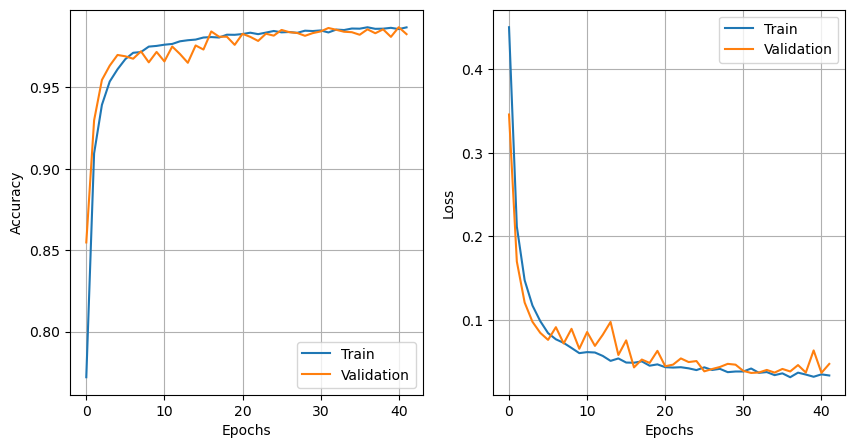

In [34]:
plt.figure(figsize = (10 , 5))

plt.subplot(1 , 2 , 1)

plt.plot(history.history['accuracy']     , label = 'Train')
plt.plot(history.history['val_accuracy'] , label = 'Validation')

plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1 , 2 , 2)

plt.plot(history.history['loss']     , label = 'Train')
plt.plot(history.history['val_loss'] , label = 'Validation')

plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.show()

In [15]:
score = model.evaluate(df_division['test'][0].to_numpy() , df_division['test'][1].to_numpy())
print(f"Loss     : {score[0]:5.3f}")
print(f"Accuracy : {score[1]*100:5.2f} %")

338/338 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9852 - loss: 0.0435
Loss     : 0.039
Accuracy : 98.46 %


In this case I've gotten a beter accuracy $\sim 98 \%$.

Saving weights...

In [36]:
model.save_weights('mushrooms.weights.h5')

In [11]:
model.load_weights('mushrooms.weights.h5')

/home/sergio/.local/lib/python3.11/site-packages/keras/src/saving/saving_lib.py:415: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


I use the _ROC curve_ for a better evaluation of the model.

In [37]:
from sklearn.metrics import roc_curve , auc
import tensorflow as tf

y_scores = model(df_division['test'][0])[:,1]
y_labels = df_division['test'][1]

fpr , tpr , tresholds = roc_curve(y_labels , y_scores)
roc_auc = auc(fpr , tpr)

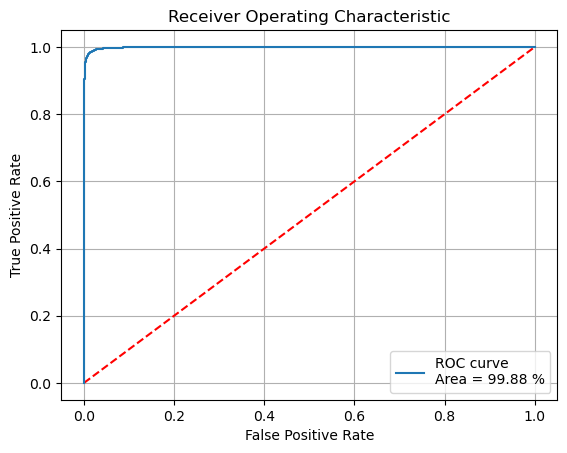

In [38]:
plt.grid()
plt.plot([0 , 1] , [0 , 1] , color = 'red' , linestyle = 'dashed')
plt.plot(fpr , tpr , label = f'ROC curve\nArea = {roc_auc*100:.2f} %')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()

The plot shows an outstanging capacity to generalize the predictions with an $AUC = 99.88 \%$ .

## Wrong Classification

In [92]:
appo = pd.DataFrame(df_division['test'][0])

appo['predi'] = np.argmax(model(df_division['test'][0]) , axis = 1)
appo['label'] = df_division['test'][1]

wrong_df = pd.DataFrame(appo[appo['label'] != appo['predi']].drop(columns = ['predi']))
wrong_df

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,label
1216,0.471179,1.000000,0.000000,0.909091,0.562143,0.469319,0.916667,0.515404,1.0
14722,0.406134,1.000000,0.833333,0.727273,0.129697,0.435416,0.916667,0.515404,1.0
13644,0.182443,1.000000,0.000000,0.909091,0.001038,0.135332,0.500000,0.515404,0.0
23205,0.323638,0.333333,1.000000,0.909091,0.067442,0.437097,0.916667,0.484596,0.0
13623,0.247488,1.000000,0.000000,1.000000,0.126362,0.153825,0.500000,0.515404,0.0
...,...,...,...,...,...,...,...,...,...
19206,0.296668,0.833333,0.166667,0.545455,0.068480,0.328383,0.916667,0.515404,0.0
24318,0.409307,1.000000,1.000000,0.909091,0.002891,0.443542,0.916667,0.515404,1.0
1422,0.544157,0.333333,0.000000,0.909091,0.575632,0.461474,0.916667,0.484596,1.0
5722,0.255420,1.000000,0.000000,0.727273,0.081746,0.246848,0.916667,0.484596,0.0


/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/home/sergio/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na 

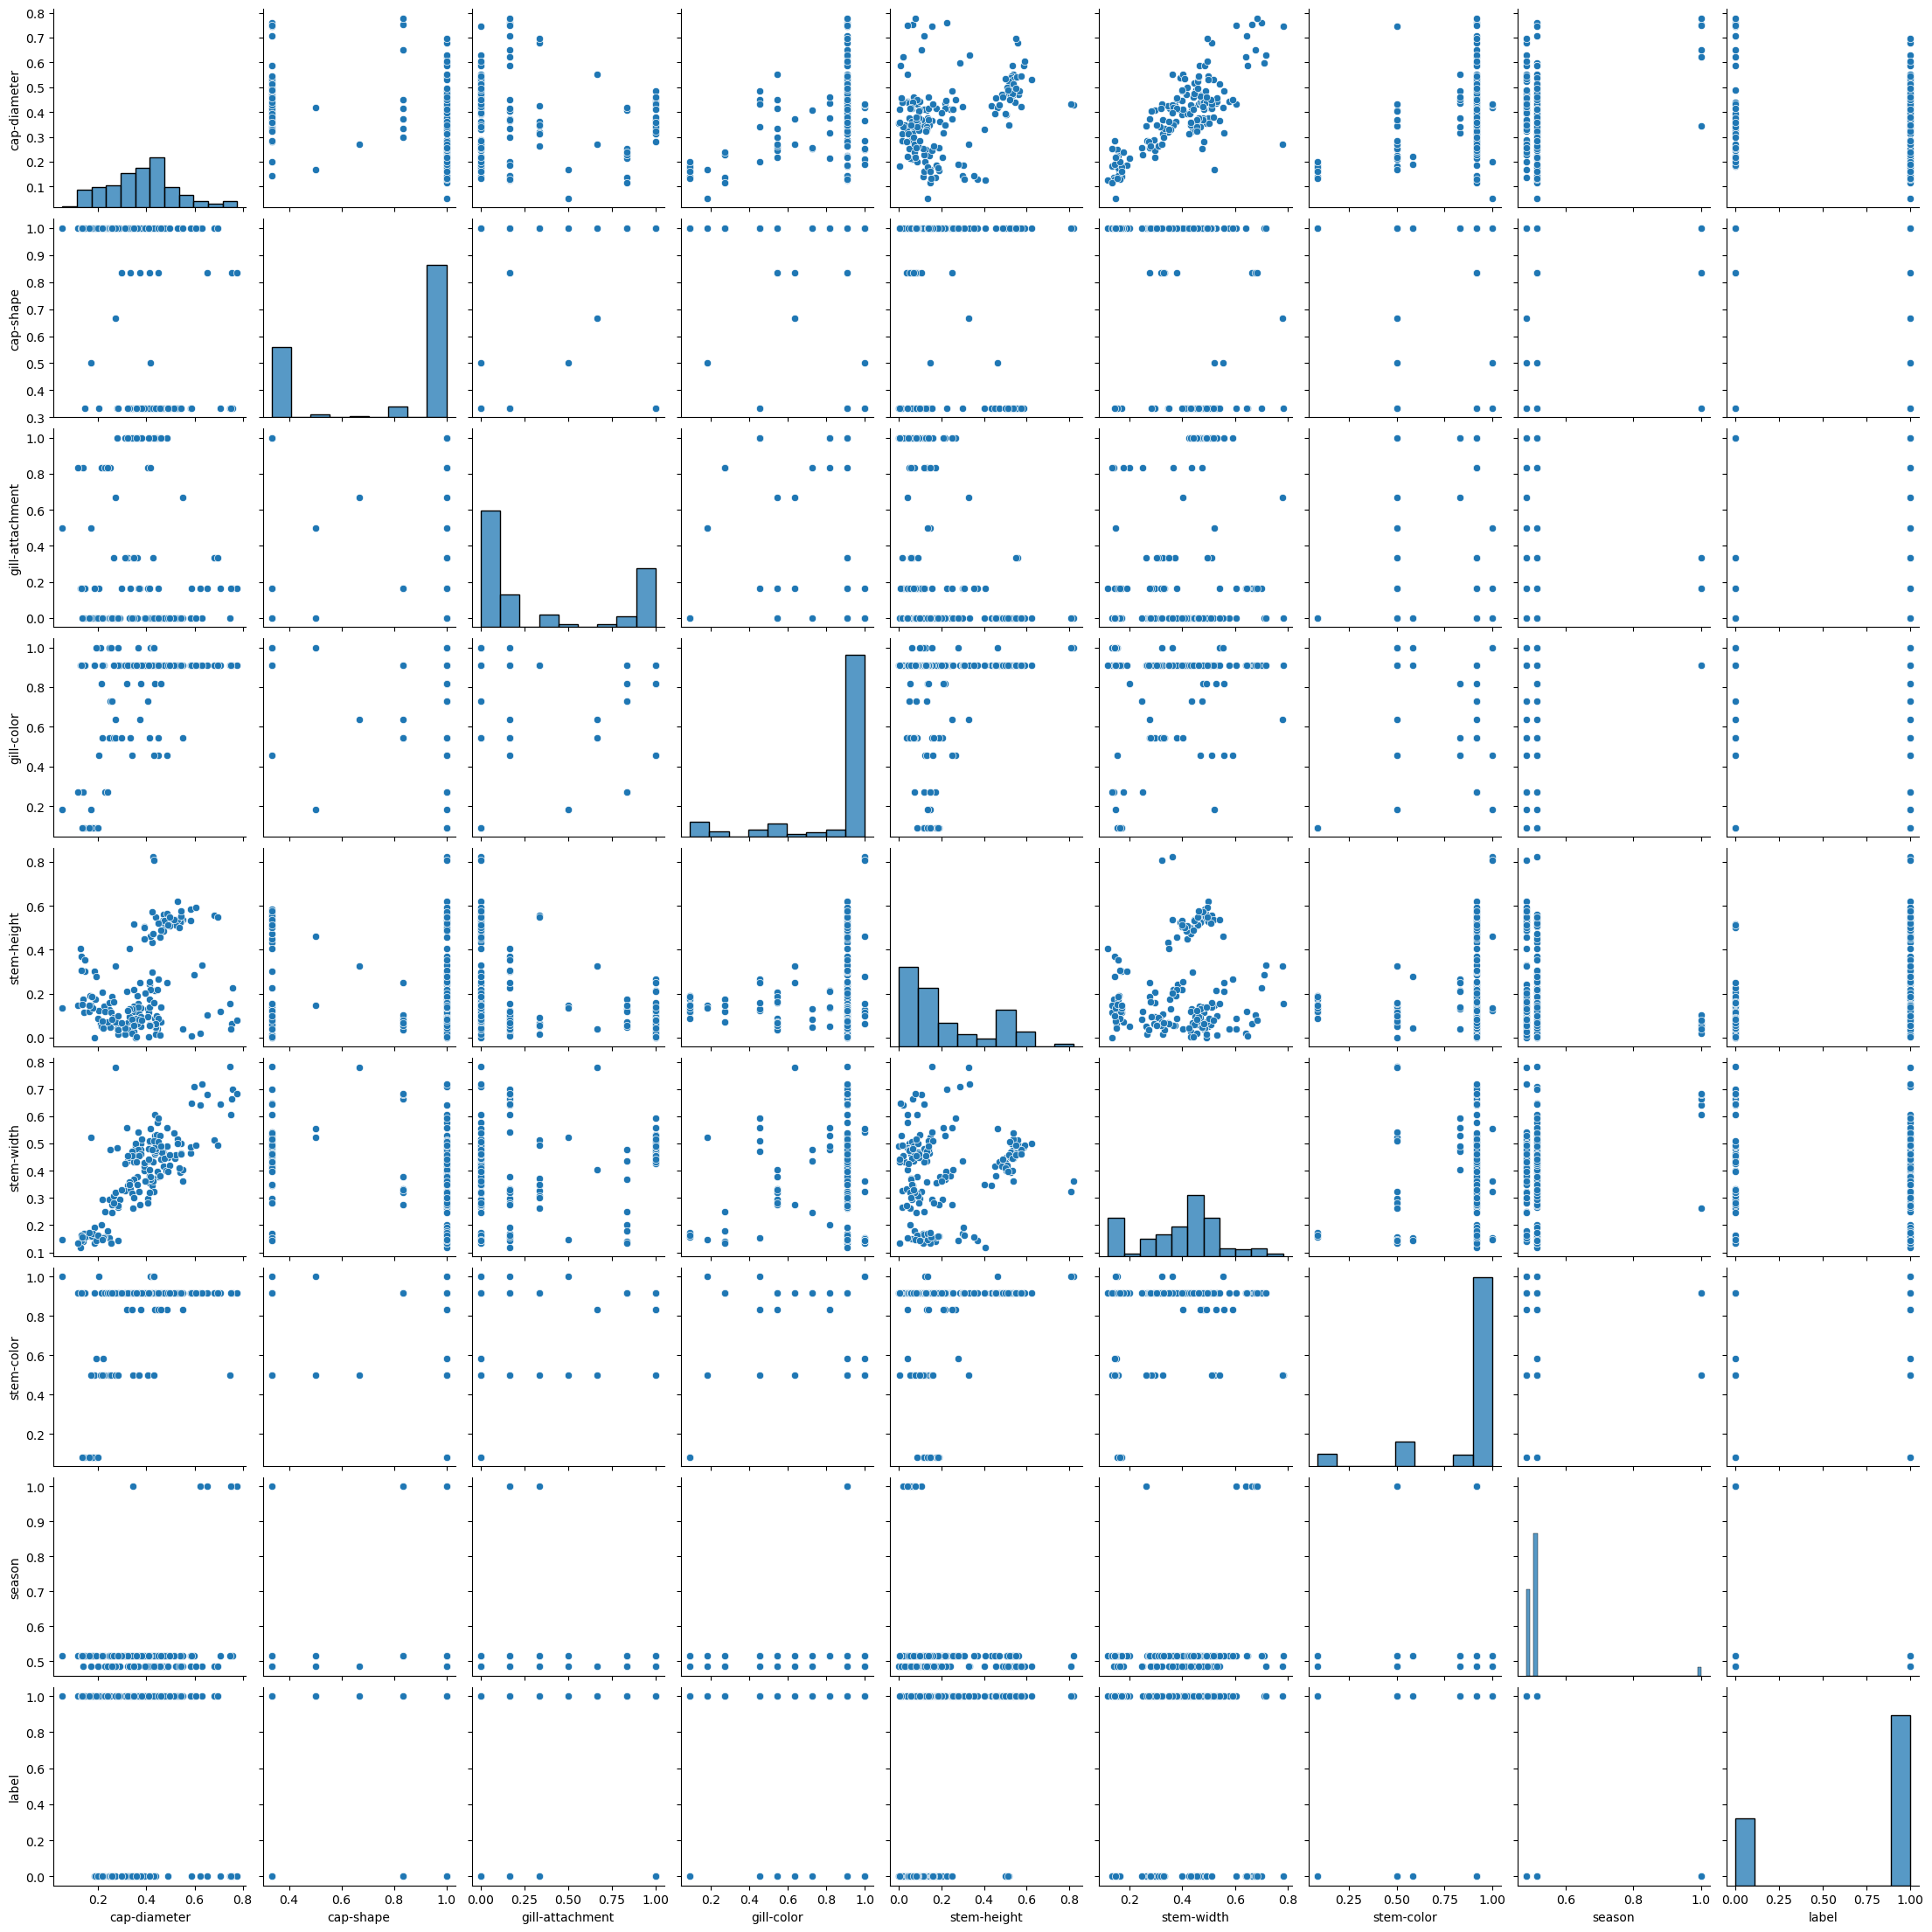

In [93]:
sns.pairplot(wrong_df)
plt.show()

## Feature Importance

Once found the optimal model and evaluated it, I tried to understand who the fatures are inluancing the result.  To do so I used [SHAP](https://shap.readthedocs.io/en/latest/) that gave an estimation through cooperaive game theory.

In [20]:
import shap

X = shap.sample(df_division['test'][0] , 400)

Let's evaluate the __shape values__, the index that shows how a feature influance the results.  Shape values have to sum up to the model resut, this means that a value $<0$ or $>0$ point to more "edibleness" or "poisoness".

In [101]:
import shap

X = shap.sample(df_division['test'][0] , 400)

explainer = shap.KernelExplainer(model.predict,X)
shap_values = explainer.shap_values(X , nsample = 100)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


Using 400 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/400 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 24s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
3175/3175 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step
1/1 ━━━━━━━━━━━

Saving data...

In [108]:
np.save('shap_values' , shap_values)

In [16]:
shap_values = np.load('shap_values.npy')

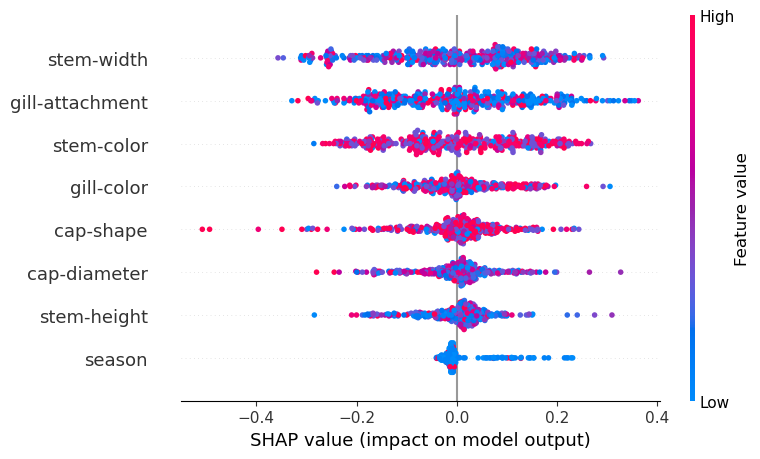

In [22]:
shap.summary_plot(shap_values[:,:,0], X , feature_names = df.columns[:-1])
plt.show()

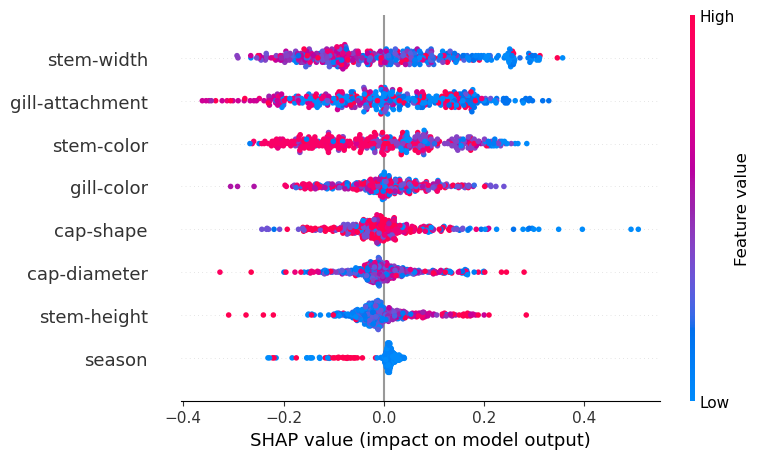

In [103]:
shap.summary_plot(shap_values[:,:,1], X , feature_names = df.columns[:-1])
plt.show()

Those plots show that some features' influance is more still around some fixed values and others that are more variable. 

In [104]:
shap.initjs()
shap.force_plot(explainer.expected_value[1] , shap_values[:,:,0] , X)

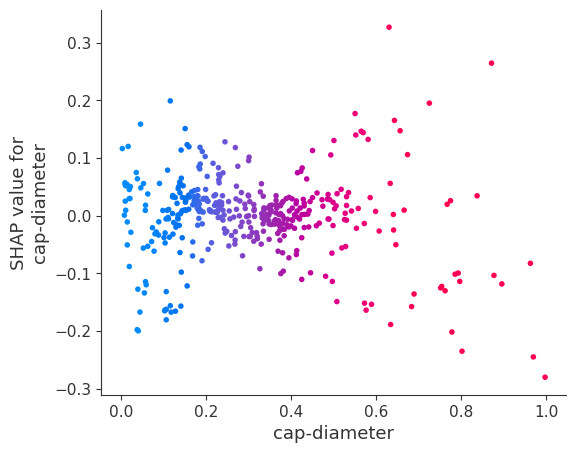

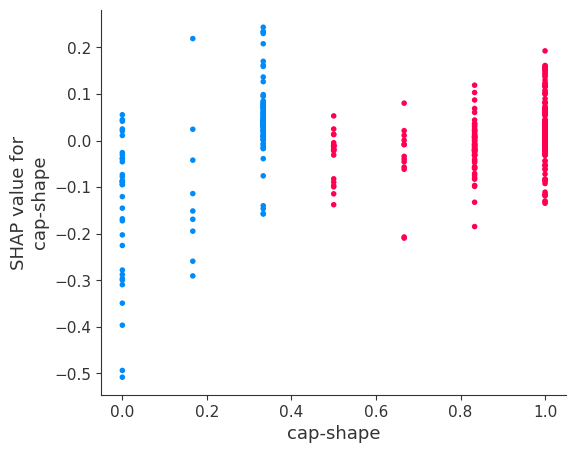

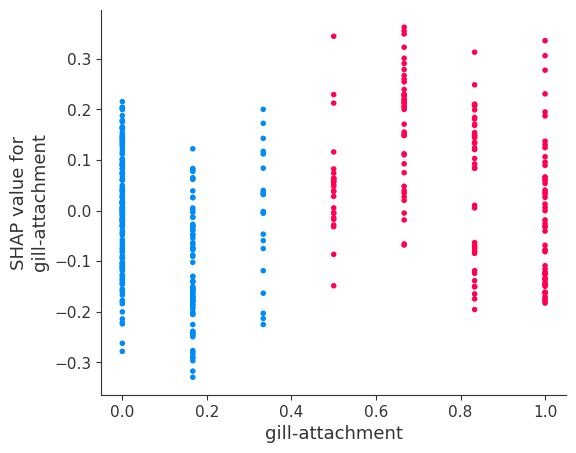

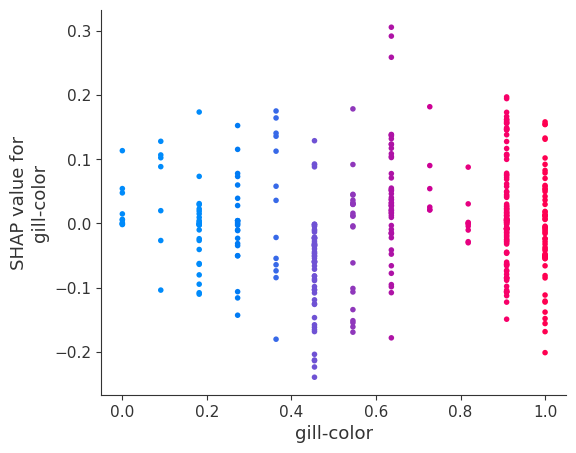

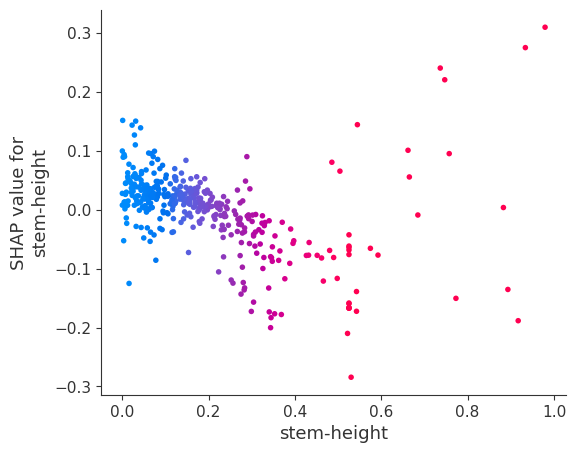

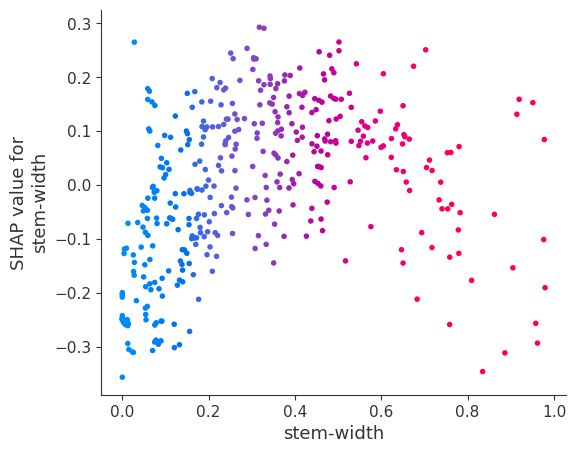

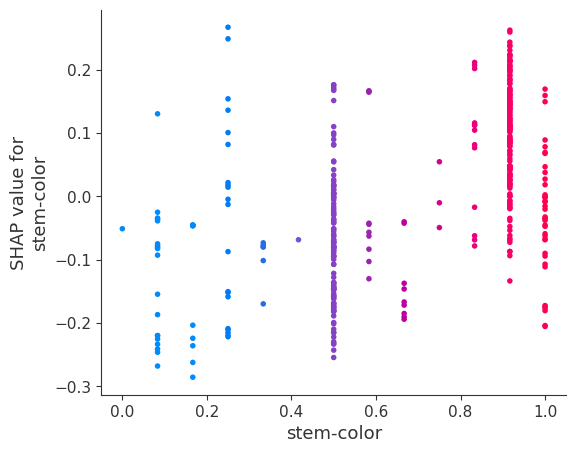

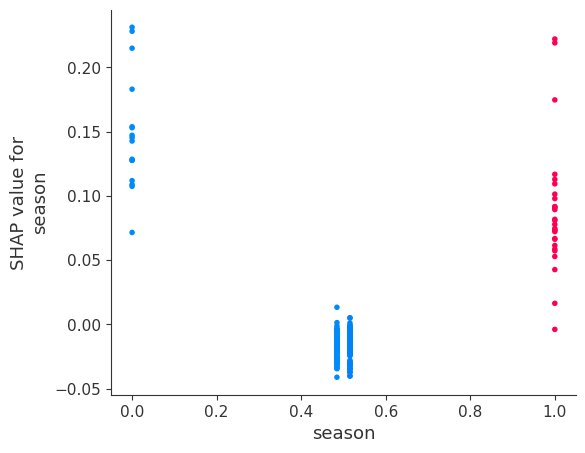

In [105]:
for i in range(8):   
    shap.dependence_plot(i,shap_values[:,:,0] , X , interaction_index = i)


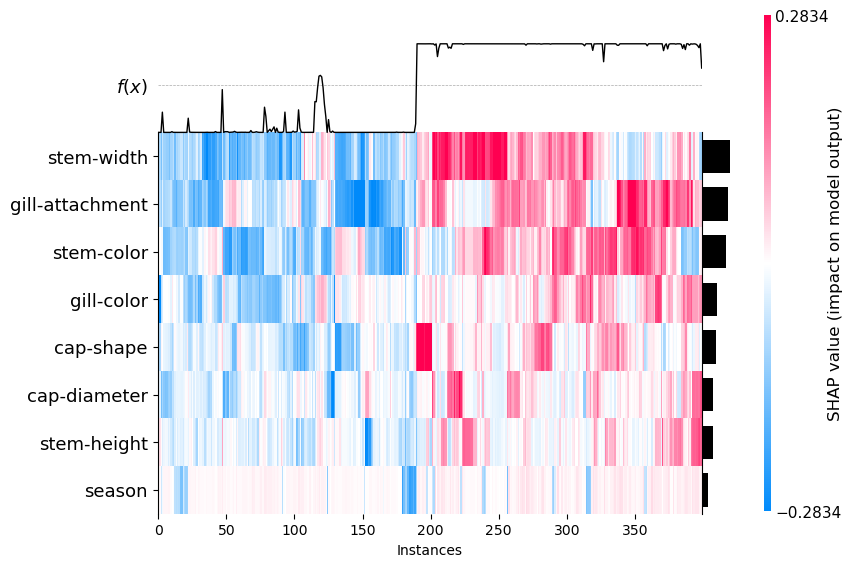

In [31]:
explaina = shap.Explanation(values = shap_values[:,:,1] ,
                            feature_names = df_division['test'][0].columns)
shap.plots.heatmap(explaina)
plt.show()

From those graphs is possible to extract some relations and behavoirs that can be investigate.

Now let's investigate possible clusetrs and dependecies that may influance the result.

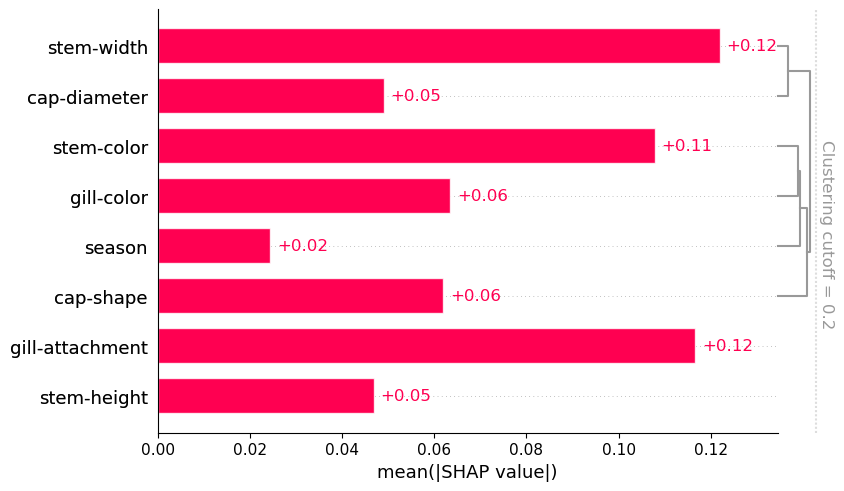

In [32]:
clusters = shap.utils.hclust(X)
shap.plots.bar(explaina[:] , clustering = clusters , clustering_cutoff = 0.2)

## Possible Implementations

1. Use the __recall__: in this case is more impore important the right classificaton of positive values becouse the maight cause more serouis consequences.
2. Try __different model schemes__.
3. Implement an __unsupervised DNN__ to study the feature importance.